In [1]:
# For tracking changes in data generated through script and GEE attribution dataset
Dataset_version = 1
GEE_data_version = 0
Python_script_version = 1
Year = '(2001-2022)'

home_folder = '/cfs/klemming/projects/supr/chandra/backup/Chalmers/'
Simulation_version = 'DeDuCE v'+str(Dataset_version)+'.'+str(GEE_data_version)+'.'+str(Python_script_version)+' ' + Year

In [2]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
import os

warnings.filterwarnings("ignore")

In [3]:
home_folder = '/cfs/klemming/projects/supr/chandra/backup/Chalmers/'
Simulation_version = 'DeDuCE v'+str(Dataset_version)+'.'+str(GEE_data_version)+'.'+str(Python_script_version)+' ' + Year
file_name = f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx'

# Aggregating the data
Att_agg = pd.read_excel(file_name, engine='openpyxl')

In [4]:
Att_agg.groupby(['Year']).sum()['Deforestation attribution, unamortized (ha)'].sum()


121794096.48989229

In [5]:
# Custom function to calculate the weighted mean
def weighted_mean(group):
    quality_index = group['Quality Index']
    weights = group['Deforestation attribution, unamortized (ha)']
    try:
        return (quality_index * weights).sum() / weights.sum()
    except ZeroDivisionError:
        return np.nan

In [27]:
Agg_results = Att_agg.groupby(['Commodity group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

Agg_results

,Commodity group,"Deforestation attribution, unamortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)",Peatland drainage emissions (MtCO2),Quality Index
0,Cereals,1.240497e+07,4555.136865,208.392530,0.354060
1,Edible roots and tubers with high starch or in...,5.392571e+06,2753.703349,75.118580,0.267849
2,Fibre crops,2.336180e+06,760.745934,88.767942,0.309882
3,Forest plantation,1.698960e+07,-683.406949,435.314283,0.298553
4,Fruit and nuts,4.181104e+06,2099.886890,88.853931,0.295124
5,Oilseeds and oleaginous fruits,2.008695e+07,5941.600041,1594.522510,0.736742
6,Pasture,5.105821e+07,21592.640214,199.461635,0.532446
7,Pulses (dried leguminous vegetables),2.363238e+06,1067.604669,31.585977,0.334320
8,"Stimulant, spice and aromatic crops",4.016254e+06,1426.398185,79.400108,0.491059
9,Sugar crops,1.534438e+06,766.750173,19.811945,0.519346


In [14]:
Att_agg['Continent/Country group'].unique()

array(['Rest of Asia', 'Europe', 'Africa', 'North and Central America',
       'South America', 'Oceania', 'Southeast Asia', 'North Asia'],
      dtype=object)

In [20]:
len(Att_agg.loc[Att_agg['Continent/Country group'] == 'Rest of Asia', 'Producer country'].unique())

26

In [28]:
for Group in Att_agg['Commodity group'].unique():
    print(Group,':', len(Att_agg.loc[Att_agg['Commodity group'] == Group, 'Commodity'].unique()))

Fruit and nuts : 50
Stimulant, spice and aromatic crops : 16
Cereals : 15
Vegetables : 26
Pasture : 2
Oilseeds and oleaginous fruits : 22
Pulses (dried leguminous vegetables) : 12
Edible roots and tubers with high starch or inulin content : 7
Fibre crops : 15
Sugar crops : 3
Forest plantation : 16


In [29]:
50+16+15+26+2+22+12+7+15+3+16

184

In [17]:
# Filter the DataFrame
filtered = Att_agg[
    (Att_agg['Commodity'] == 'Sugar cane') &
    (Att_agg['Producer country'] == 'Argentina') &
    (Att_agg['Year'] >= 2004) &
    (Att_agg['Year'] <= 2022)
]

# Calculate sum and weighted mean
deforestation_sum = filtered['Deforestation attribution, unamortized (ha)'].sum()
quality_index_weighted_mean = weighted_mean(filtered)

# Create result as a DataFrame
result = pd.DataFrame([{
    'Deforestation attribution, unamortized (ha)': deforestation_sum,
    'Quality Index': round(quality_index_weighted_mean, 2)
}])

result

,"Deforestation attribution, unamortized (ha)",Quality Index
0,18541.028923,0.38


In [5]:
Singh_et_al_TCL = pd.read_excel(f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Aggregated_TCL_statistics.xlsx', engine='openpyxl')

In [6]:
Singh_et_al_TCL.loc[Singh_et_al_TCL['Country'] == 'Mexico', 'Country'] = 'México'
Singh_et_al_TCL.loc[Singh_et_al_TCL['Country'] == 'Cote dIvoire', 'Country'] = 'Côte d\'Ivoire'
Singh_et_al_TCL.loc[Singh_et_al_TCL['Country'] == 'Sao Tome and Principe', 'Country'] = 'São Tomé and Príncipe'

Total_tree_cover_loss 470935676.20670116 
Forestloss_and_deforestation: 327805546.79052603 ( 69.6 ) 
Forest_fire: 116440232.25808325 ( 24.7 ) 
Agriculture_and_forestry_deforestation: 150053362.70636925 ( 31.9 ) 
Agriculture_and_forestry_deforestation_production: 121794169.35168846 ( 25.9 )


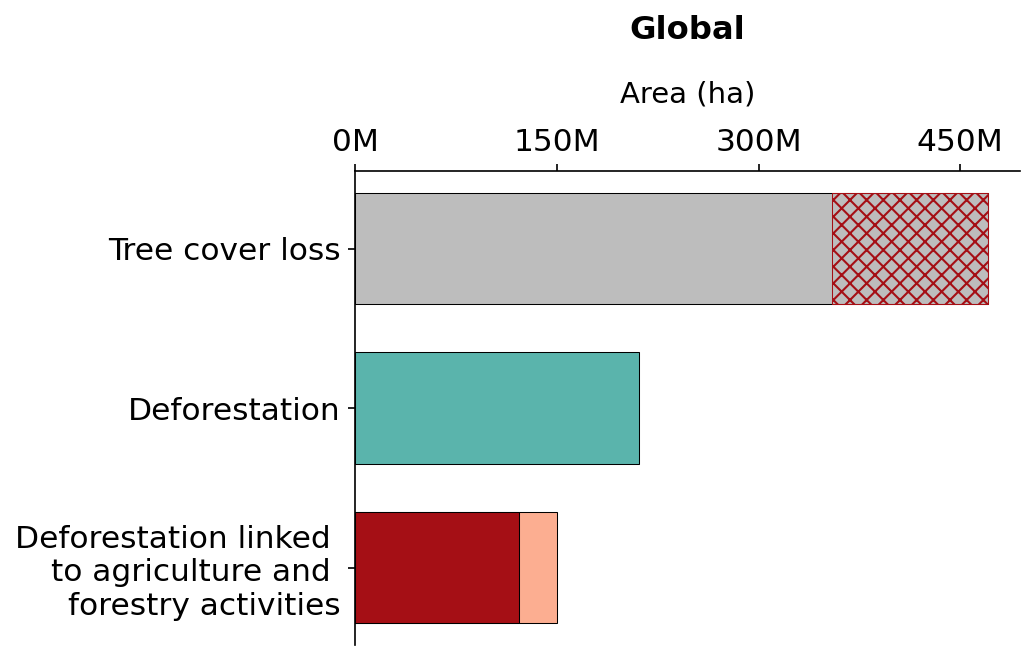

In [7]:
Singh_et_al_TCL

import matplotlib.pyplot as plt
import math


# Example area values for each circle, replace these with actual values
Total_tree_cover_loss = Singh_et_al_TCL.sum()['Treecover loss']
Forestloss_and_deforestation = Singh_et_al_TCL.sum()['Forestloss and deforestation']
Agriculture_and_forestry_deforestation = Singh_et_al_TCL.sum()['Agriculture and forestry deforestation']
Agriculture_and_forestry_deforestation_production = Singh_et_al_TCL.sum()['Agriculture and forestry deforestation (Production)']
Forest_fire = Singh_et_al_TCL.sum()['Forest fire']

print('Total_tree_cover_loss', Total_tree_cover_loss, 
      '\nForestloss_and_deforestation:', Forestloss_and_deforestation, '(',round(Forestloss_and_deforestation*100/Total_tree_cover_loss, 1),')', 
      '\nForest_fire:',  Forest_fire, '(',round(Forest_fire*100/Total_tree_cover_loss, 1),')',
      '\nAgriculture_and_forestry_deforestation:', Agriculture_and_forestry_deforestation,'(', round(Agriculture_and_forestry_deforestation*100/Total_tree_cover_loss, 1),')',
      '\nAgriculture_and_forestry_deforestation_production:', Agriculture_and_forestry_deforestation_production, '(', round(Agriculture_and_forestry_deforestation_production*100/Total_tree_cover_loss, 1),')',)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=150)

# Define y-axis labels in the desired top-to-bottom order
x_labels_reversed = [
    'Tree cover loss',
    'Deforestation',
    'Deforestation linked \nto agriculture and \nforestry activities'
]
x_reversed = np.arange(len(x_labels_reversed))[::-1]  # Reversed order for top-down plotting

# Set bar height and spacing manually
bar_height = 0.07
spacing = 0.3  # minimal spacing between bars

# Adjust vertical positions for spacing
bar_positions = np.array([0.20, 0.10, 0.0])  # Custom y-positions

# Tree cover loss with forest fire hatched on top
ax.barh(bar_positions[0], Total_tree_cover_loss, color='#bdbdbd', edgecolor='black', height=bar_height, linewidth=0.5)
ax.barh(bar_positions[0], Forest_fire, color='none', edgecolor='#a50f15', hatch='xxx', linewidth=0.5,
        left=Total_tree_cover_loss - Forest_fire, height=bar_height, label='Forest fire (subset)')

# Deforestation bar
ax.barh(bar_positions[1], Forestloss_and_deforestation - Forest_fire, color='#5ab4ac', edgecolor='black', height=bar_height, linewidth=0.5)

# Agriculture and Forestry deforestation with production subset
ax.barh(bar_positions[2], Agriculture_and_forestry_deforestation, color='#fcae91', edgecolor='black', height=bar_height, linewidth=0.5)
ax.barh(bar_positions[2], Agriculture_and_forestry_deforestation_production, color='#a50f15', edgecolor='black', 
        height=bar_height, linewidth=0.5)

# Format x-axis labels as millions
def million_formatter(x, pos):
    return '{:.0f}M'.format(x / 10**6)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(million_formatter))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

# Shift x-axis to top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Set y-ticks and bold labels
ax.set_yticks(bar_positions)
ax.set_yticklabels(x_labels_reversed)

# Remove all spines, then restore top and left
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)

# Axis labels and title
ax.set_xlabel('Area (ha)', labelpad=12, fontsize = 14)
ax.set_title('Global', pad=20, fontsize = 15.5, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=15)


plt.tight_layout()
plt.show()
fig.savefig('/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure1_a.svg')

In [8]:
Att_agg.groupby(['Year']).sum()['Deforestation attribution, unamortized (ha)']

# Step 3: Calculate the mean and standard deviation
mean_value = np.mean(Att_agg.groupby(['Year']).sum()['Deforestation attribution, unamortized (ha)'].values)
std_deviation = np.std(Att_agg.groupby(['Year']).sum()['Deforestation attribution, unamortized (ha)'].values)

# Print the results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 5536095.294995104
Standard Deviation: 817071.9772408358


In [9]:
# Contains Ecoregion group for GADM countries
Country_lookup_codes_ecoregion = pd.read_excel(home_folder+Simulation_version+'/Supplementary_data-DeDuCE v1.xlsx', 'Lookup-Country (GADM)', engine='openpyxl')  

In [10]:
Singh_et_al_TCL['Ecoregion'] = Singh_et_al_TCL['Country'].map((Country_lookup_codes_ecoregion.set_index('COUNTRY')['ECOREGION GROUP']).dropna())

Total_tree_cover_loss 244154097.18583536 
Forestloss_and_deforestation: 151303421.34409946 ( 62.0 ) 
Forest_fire: 11881878.900490254 ( 4.9 ) 
Agriculture_and_forestry_deforestation: 130493995.32089007 ( 53.4 ) 
Agriculture_and_forestry_deforestation_production: 102441792.05952024 ( 42.0 )


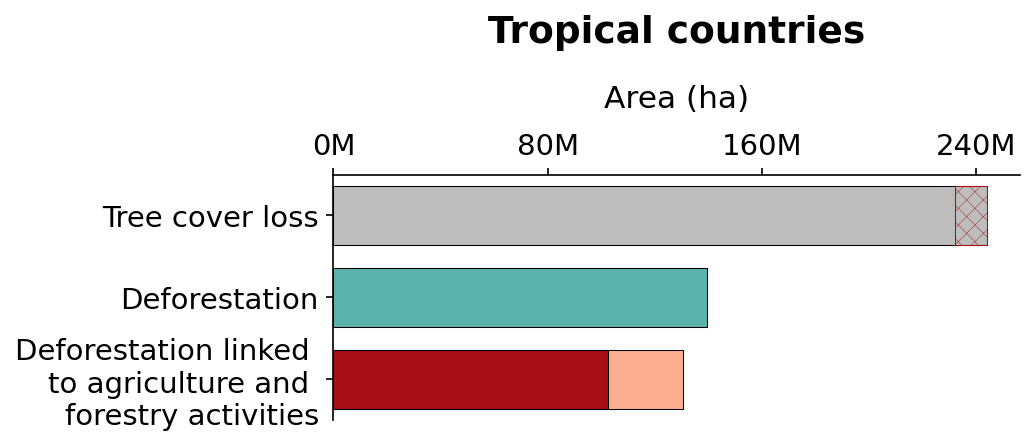

In [151]:
Singh_et_al_TCL_tropical = Singh_et_al_TCL.loc[Singh_et_al_TCL['Ecoregion'] == 'Tropical']
Singh_et_al_TCL_nottropical = Singh_et_al_TCL.loc[Singh_et_al_TCL['Ecoregion'] != 'Tropical']

import matplotlib.pyplot as plt
import math


# Example area values for each circle, replace these with actual values
Total_tree_cover_loss = Singh_et_al_TCL_tropical.sum()['Treecover loss']
Forestloss_and_deforestation = Singh_et_al_TCL_tropical.sum()['Forestloss and deforestation']
Agriculture_and_forestry_deforestation = Singh_et_al_TCL_tropical.sum()['Agriculture and forestry deforestation']
Agriculture_and_forestry_deforestation_production = Singh_et_al_TCL_tropical.sum()['Agriculture and forestry deforestation (Production)']
Forest_fire = Singh_et_al_TCL_tropical.sum()['Forest fire']

print('Total_tree_cover_loss', Total_tree_cover_loss, 
      '\nForestloss_and_deforestation:', Forestloss_and_deforestation, '(',round(Forestloss_and_deforestation*100/Total_tree_cover_loss, 1),')', 
      '\nForest_fire:',  Forest_fire, '(',round(Forest_fire*100/Total_tree_cover_loss, 1),')',
      '\nAgriculture_and_forestry_deforestation:', Agriculture_and_forestry_deforestation,'(', round(Agriculture_and_forestry_deforestation*100/Total_tree_cover_loss, 1),')',
      '\nAgriculture_and_forestry_deforestation_production:', Agriculture_and_forestry_deforestation_production, '(', round(Agriculture_and_forestry_deforestation_production*100/Total_tree_cover_loss, 1),')',)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(7, 3), dpi=150)

# Define y-axis labels in the desired top-to-bottom order
x_labels_reversed = [
    'Tree cover loss',
    'Deforestation',
    'Deforestation linked \nto agriculture and \nforestry activities'
]
x_reversed = np.arange(len(x_labels_reversed))[::-1]  # Reversed order for top-down plotting

# Set bar height and spacing manually
bar_height = 0.05
spacing = 0.3  # minimal spacing between bars

# Adjust vertical positions for spacing
bar_positions = np.array([0.14, 0.07, 0.0])  # Custom y-positions

# Tree cover loss with forest fire hatched on top
ax.barh(bar_positions[0], Total_tree_cover_loss, color='#bdbdbd', edgecolor='black', height=bar_height, linewidth=0.5)
ax.barh(bar_positions[0], Forest_fire, color='none', edgecolor='#a50f15', hatch='xxx', linewidth=0.5,
        left=Total_tree_cover_loss - Forest_fire, height=bar_height, label='Forest fire (subset)')

# Deforestation bar
ax.barh(bar_positions[1], Forestloss_and_deforestation - Forest_fire, color='#5ab4ac', edgecolor='black', height=bar_height, linewidth=0.5)

# Agriculture and Forestry deforestation with production subset
ax.barh(bar_positions[2], Agriculture_and_forestry_deforestation, color='#fcae91', edgecolor='black', height=bar_height, linewidth=0.5)
ax.barh(bar_positions[2], Agriculture_and_forestry_deforestation_production, color='#a50f15', edgecolor='black', 
        height=bar_height, linewidth=0.5)

# Format x-axis labels as millions
def million_formatter(x, pos):
    return '{:.0f}M'.format(x / 10**6)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(million_formatter))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

# Shift x-axis to top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Set y-ticks and bold labels
ax.set_yticks(bar_positions)
ax.set_yticklabels(x_labels_reversed)

# Remove all spines, then restore top and left
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)

# Axis labels and title
ax.set_xlabel('Area (ha)', labelpad=12, fontsize = 15)
ax.set_title('Tropical countries', pad=20, fontsize = 18, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()
fig.savefig('/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure1_b.svg')

Total_tree_cover_loss 226781579.0208658 
Forestloss_and_deforestation: 176502125.4464266 ( 77.8 ) 
Forest_fire: 104558353.35759299 ( 46.1 ) 
Agriculture_and_forestry_deforestation: 19559367.385479186 ( 8.6 ) 
Agriculture_and_forestry_deforestation_production: 19352377.292168215 ( 8.5 )


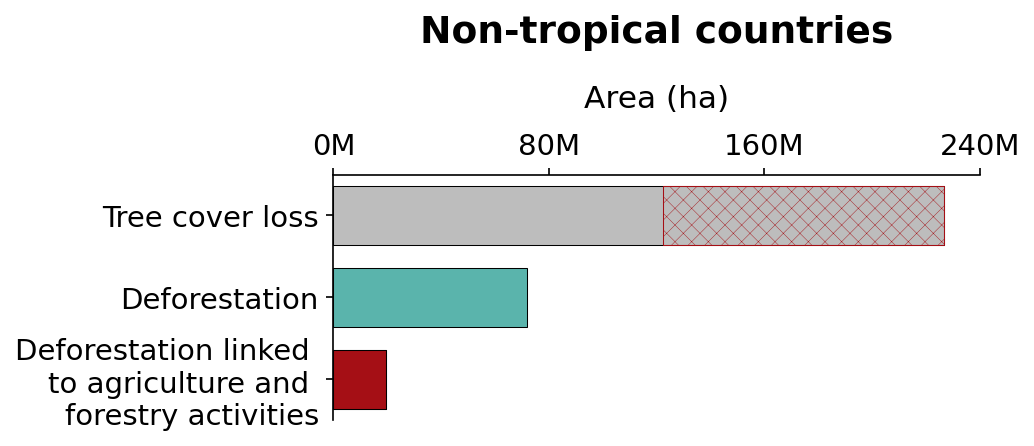

In [153]:
# Example area values for each circle, replace these with actual values
Total_tree_cover_loss = Singh_et_al_TCL_nottropical.sum()['Treecover loss']
Forestloss_and_deforestation = Singh_et_al_TCL_nottropical.sum()['Forestloss and deforestation']
Agriculture_and_forestry_deforestation = Singh_et_al_TCL_nottropical.sum()['Agriculture and forestry deforestation']
Agriculture_and_forestry_deforestation_production = Singh_et_al_TCL_nottropical.sum()['Agriculture and forestry deforestation (Production)']
Forest_fire = Singh_et_al_TCL_nottropical.sum()['Forest fire']

print('Total_tree_cover_loss', Total_tree_cover_loss, 
      '\nForestloss_and_deforestation:', Forestloss_and_deforestation, '(',round(Forestloss_and_deforestation*100/Total_tree_cover_loss, 1),')', 
      '\nForest_fire:',  Forest_fire, '(',round(Forest_fire*100/Total_tree_cover_loss, 1),')',
      '\nAgriculture_and_forestry_deforestation:', Agriculture_and_forestry_deforestation,'(', round(Agriculture_and_forestry_deforestation*100/Total_tree_cover_loss, 1),')',
      '\nAgriculture_and_forestry_deforestation_production:', Agriculture_and_forestry_deforestation_production, '(', round(Agriculture_and_forestry_deforestation_production*100/Total_tree_cover_loss, 1),')',)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(7, 3), dpi=150)

# Define y-axis labels in the desired top-to-bottom order
x_labels_reversed = [
    'Tree cover loss',
    'Deforestation',
    'Deforestation linked \nto agriculture and \nforestry activities'
]
x_reversed = np.arange(len(x_labels_reversed))[::-1]  # Reversed order for top-down plotting

# Set bar height and spacing manually
bar_height = 0.05
spacing = 0.3  # minimal spacing between bars

# Adjust vertical positions for spacing
bar_positions = np.array([0.14, 0.07, 0.0])  # Custom y-positions

# Tree cover loss with forest fire hatched on top
ax.barh(bar_positions[0], Total_tree_cover_loss, color='#bdbdbd', edgecolor='black', height=bar_height, linewidth=0.5)
ax.barh(bar_positions[0], Forest_fire, color='none', edgecolor='#a50f15', hatch='xxx', linewidth=0.5,
        left=Total_tree_cover_loss - Forest_fire, height=bar_height, label='Forest fire (subset)')

# Deforestation bar
ax.barh(bar_positions[1], Forestloss_and_deforestation - Forest_fire, color='#5ab4ac', edgecolor='black', height=bar_height, linewidth=0.5)

# Agriculture and Forestry deforestation with production subset
ax.barh(bar_positions[2], Agriculture_and_forestry_deforestation, color='#fcae91', edgecolor='black', height=bar_height, linewidth=0.5)
ax.barh(bar_positions[2], Agriculture_and_forestry_deforestation_production, color='#a50f15', edgecolor='black', 
        height=bar_height, linewidth=0.5)

# Format x-axis labels as millions
def million_formatter(x, pos):
    return '{:.0f}M'.format(x / 10**6)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(million_formatter))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

# Shift x-axis to top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Set y-ticks and bold labels
ax.set_yticks(bar_positions)
ax.set_yticklabels(x_labels_reversed)

# Remove all spines, then restore top and left
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.set_xticks([0, 80*10**6, 160*10**6, 240*10**6])

# Axis labels and title
ax.set_xlabel('Area (ha)', labelpad=12, fontsize = 15)
ax.set_title('Non-tropical countries', pad=20, fontsize = 18, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()
fig.savefig('/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure1_c.svg')

In [154]:
Singh_et_al_TCL['Deforestation'] = Singh_et_al_TCL['Forestloss and deforestation'] - Singh_et_al_TCL['Forest fire']  

In [155]:
Source_Fig_1 = Singh_et_al_TCL[['Country', 'Ecoregion', 'Treecover loss', 'Forest fire', 'Deforestation', 'Agriculture and forestry deforestation', 'Agriculture and forestry deforestation (Production)']]

In [156]:
Source_Fig_1.to_csv('/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Source_Fig_1.csv')

In [7]:
Singh_et_al = pd.read_excel(f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx', sheet_name = 'Deforestation attribution', engine='openpyxl')

In [8]:
len(Singh_et_al['Commodity'].unique())

184

In [9]:
len(Singh_et_al['Producer country'].unique())

181

In [10]:
Singh_et_al.groupby(['Commodity', 'Producer country']).size().reset_index(name='Counts')

,Commodity,Producer country,Counts
0,"Abaca, manila hemp, raw",Costa Rica,22
1,"Abaca, manila hemp, raw",Ecuador,22
2,"Abaca, manila hemp, raw",Equatorial Guinea,22
3,"Abaca, manila hemp, raw",Indonesia,22
4,"Abaca, manila hemp, raw",Philippines,22
...,...,...,...
9327,Yautia,Peru,22
9328,Yautia,Puerto Rico,22
9329,Yautia,Saint Lucia,22
9330,Yautia,Trinidad and Tobago,22


In [11]:
Crop_category = pd.read_excel(home_folder+Simulation_version+'/Supplementary_data-DeDuCE v1.xlsx', 'Lookup-FAO commodity', engine='openpyxl')  
Continent = pd.read_excel(home_folder+Simulation_version+'/Supplementary_data-DeDuCE v1.xlsx', 'Lookup-Country (GADM)', engine='openpyxl')        


In [12]:
Singh_et_al_grouped = Singh_et_al.groupby(['Continent/Country group', 'Producer country', 'Commodity group', 'Commodity', 'Year']).sum().reset_index()[['Continent/Country group',
                                                                                         'Deforestation attribution, unamortized (ha)', 
                                                                                         'Deforestation emissions excl. peat drainage, unamortized (MtCO2)',
                                                                                                             'Peatland drainage emissions (MtCO2)']]

In [13]:
Country_group_color = {
    'Continent/Country group': ['Africa', 'Europe', 'North and Central America', 'Oceania', 'South America', 'North Asia', 'Southeast Asia', 'Rest of Asia'],
    'Color': ['#DD7271', '#FBD440', '#CDDC21', '#A1A8DC', '#CA93DA', '#64D0E2', '#B7B7B7', '#3197A8']
}

Country_group_color = pd.DataFrame(Country_group_color)
Country_group_color

,Continent/Country group,Color
0,Africa,#DD7271
1,Europe,#FBD440
2,North and Central America,#CDDC21
3,Oceania,#A1A8DC
4,South America,#CA93DA
5,North Asia,#64D0E2
6,Southeast Asia,#B7B7B7
7,Rest of Asia,#3197A8


In [14]:
Country_group = Singh_et_al_grouped.groupby(['Continent/Country group']).sum().reset_index()
Country_group['Color'] = Country_group['Continent/Country group'].map(Country_group_color.set_index('Continent/Country group')['Color'])
Country_group = Country_group.set_index('Continent/Country group').reindex(index=Country_group_color['Continent/Country group']).reset_index()
#Country_group = Country_group.rename(columns = {'Country': 'Continent/Country group'})

In [15]:
Country_group

,Continent/Country group,"Deforestation attribution, unamortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)",Peatland drainage emissions (MtCO2),Color
0,Africa,2.168126e+07,8040.208074,178.196176,#DD7271
1,Europe,1.067287e+06,101.177566,19.833781,#FBD440
2,North and Central America,9.236562e+06,1071.417532,107.537901,#CDDC21
3,Oceania,1.402479e+06,552.529078,44.226171,#A1A8DC
4,South America,5.624447e+07,22435.624596,88.316986,#CA93DA
5,North Asia,8.068203e+06,88.210743,18.579090,#64D0E2
6,Southeast Asia,2.250445e+07,8626.044618,2411.780019,#B7B7B7
7,Rest of Asia,1.589387e+06,317.481615,16.517800,#3197A8


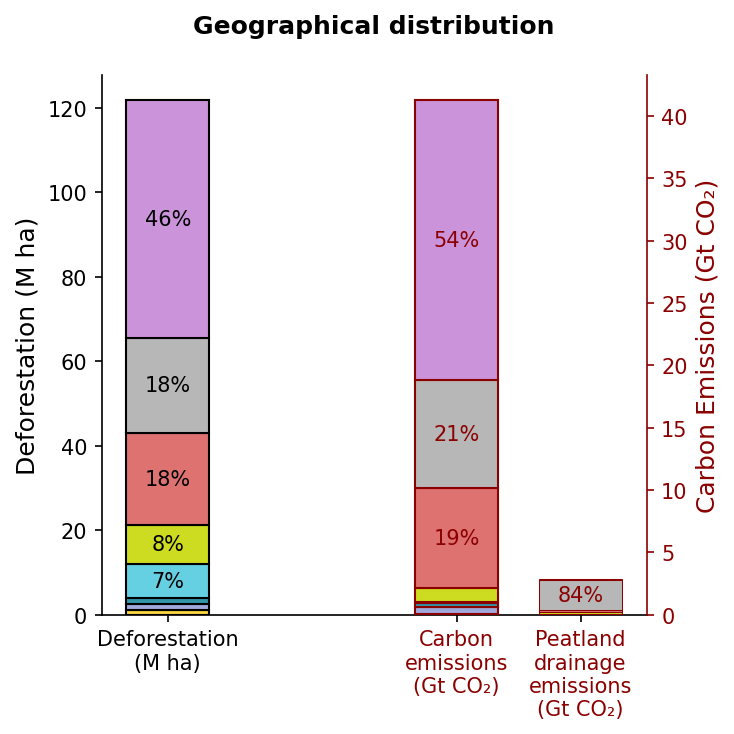

In [16]:
# Sort dataframe by deforestation values descending
Country_group_sorted = Country_group.sort_values(
    by='Deforestation attribution, unamortized (ha)', ascending=True)

## Set up figure and axis
fig, ax1 = plt.subplots(figsize=(5, 5), dpi=150)

x_vars = [
    'Deforestation attribution, unamortized (ha)',
    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)',
    'Peatland drainage emissions (MtCO2)'
]
x_labels = [
    'Deforestation\n(M ha)',
    'Carbon\nemissions\n(Gt CO₂)',
    'Peatland\ndrainage\nemissions\n(Gt CO₂)'
]

# Create second y-axis
ax2 = ax1.twinx()

bar_width = 0.4
x = [0, 1.4, 2]

# Initialize bottom values for stacking
bottom_deforestation = 0
bottom_emissions_carbon = 0
bottom_emissions_peat = 0

# Track totals for percentage calculations
total_deforestation = Country_group_sorted['Deforestation attribution, unamortized (ha)'].sum() / 1e6
total_carbon_emissions = Country_group_sorted['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum() / 1000
total_peat_emissions = Country_group_sorted['Peatland drainage emissions (MtCO2)'].sum() / 1000

# Loop through each group and stack bars
for idx, row in Country_group_sorted.iterrows():
    deforestation_val = row['Deforestation attribution, unamortized (ha)'] / 1e6
    carbon_emission_val = row['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] / 1000
    peat_emission_val = row['Peatland drainage emissions (MtCO2)'] / 1000

    # Deforestation bar
    ax1.bar(x[0], deforestation_val, bottom=bottom_deforestation,
            color=row['Color'], edgecolor='black', width=bar_width)
    # Carbon emissions bar
    ax2.bar(x[1], carbon_emission_val, bottom=bottom_emissions_carbon,
            color=row['Color'], edgecolor='#8b0000', width=bar_width)
    # Peat emissions bar
    ax2.bar(x[2], peat_emission_val, bottom=bottom_emissions_peat,
            color=row['Color'], edgecolor='#8b0000', width=bar_width, lw = 0.5)

    # Compute centers for labels
    center_deforestation = bottom_deforestation + deforestation_val / 2
    center_carbon = bottom_emissions_carbon + carbon_emission_val / 2
    center_peat = bottom_emissions_peat + peat_emission_val / 2

    # Calculate percentages
    pct_deforestation = (deforestation_val / total_deforestation) * 100
    pct_carbon = (carbon_emission_val / total_carbon_emissions) * 100
    pct_peat = (peat_emission_val / total_peat_emissions) * 100

    # Annotate if >=10%
    if pct_deforestation >= 5:
        ax1.text(x[0], center_deforestation, f"{int(round(pct_deforestation))}%", ha='center', va='center', fontsize=10, color='black')
    if pct_carbon >= 10:
        ax2.text(x[1], center_carbon, f"{int(round(pct_carbon))}%", ha='center', va='center', fontsize=10, color='#8b0000')
    if pct_peat >= 10:
        ax2.text(x[2], center_peat, f"{int(round(pct_peat))}%", ha='center', va='center', fontsize=10, color='#8b0000')

    # Update bottom values
    bottom_deforestation += deforestation_val
    bottom_emissions_carbon += carbon_emission_val
    bottom_emissions_peat += peat_emission_val

# Set x-ticks
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)

# Set axis labels
ax1.set_ylabel('Deforestation (M ha)', fontsize = 12)
ax2.set_ylabel('Carbon Emissions (Gt CO₂)', color='#8b0000', fontsize = 12)
ax2.tick_params(axis='y', colors='#8b0000')
ax2.yaxis.label.set_color('#8b0000')

label_colors = ['black', '#8b0000', '#8b0000']
for txt, col in zip(ax1.get_xticklabels(), label_colors):
    txt.set_color(col)

# Clean spines
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

# Keep bottom and left for ax1, right for ax2
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('#8b0000')

# Set title
plt.title('Geographical distribution', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
fig.savefig('/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure3_a.svg')

In [17]:
Selected_data = Singh_et_al.groupby(['Continent/Country group', 'Producer country']).sum().reset_index()[['Continent/Country group', 'Producer country',
                                                                                                            'Deforestation attribution, unamortized (ha)', 
                                                                                                            'Deforestation emissions excl. peat drainage, unamortized (MtCO2)']]

In [18]:
# Here's how you'd transform the 'Commodity' column:
Countries_to_keep = ['Brazil', 'Indonesia', 'Democratic Republic of the Congo', 'Côte d\'Ivoire', 'China', 'United States']

Selected_data = Selected_data.loc[Selected_data['Producer country'].isin(Countries_to_keep)]
Selected_data

,Continent/Country group,Producer country,"Deforestation attribution, unamortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)"
11,Africa,Côte d'Ivoire,3.012392e+06,693.271086
12,Africa,Democratic Republic of the Congo,7.307966e+06,3807.594571
92,North Asia,China,7.221283e+06,-97.609506
121,North and Central America,United States,5.446757e+06,-137.026315
158,South America,Brazil,3.832922e+07,16955.985238
172,Southeast Asia,Indonesia,1.092031e+07,3889.184024


In [19]:
Commodity_group_color = {
    'Commodity group': ['Cereals', 'Edible roots and tubers with high starch or inulin content', 'Fibre crops', 'Forest plantation', 'Fruit and nuts', 'Oilseeds and oleaginous fruits', 'Pasture', 'Pulses (dried leguminous vegetables)', 'Stimulant, spice and aromatic crops', 'Sugar crops', 'Vegetables'],
    'Color': ['#d8b365', '#999999', '#fc8d59', '#4ce600', '#2b8cbe', '#810f7c', '#d4b9da', '#081d58', '#e7298a', '#ffff33', '#00a844']
}

Commodity_group_color = pd.DataFrame(Commodity_group_color)
Commodity_group_color

,Commodity group,Color
0,Cereals,#d8b365
1,Edible roots and tubers with high starch or in...,#999999
2,Fibre crops,#fc8d59
3,Forest plantation,#4ce600
4,Fruit and nuts,#2b8cbe
5,Oilseeds and oleaginous fruits,#810f7c
6,Pasture,#d4b9da
7,Pulses (dried leguminous vegetables),#081d58
8,"Stimulant, spice and aromatic crops",#e7298a
9,Sugar crops,#ffff33


In [20]:
Singh_et_al_grouped = Singh_et_al.groupby(['Continent/Country group', 'Producer country', 'Commodity group', 'Commodity', 'Year']).sum().reset_index()[['Commodity group',
                                                                                         'Deforestation attribution, unamortized (ha)', 
                                                                                         'Deforestation emissions excl. peat drainage, unamortized (MtCO2)',
                                                                                        'Peatland drainage emissions (MtCO2)']]

In [21]:
Commodity_group = Singh_et_al_grouped.groupby(['Commodity group']).sum().reset_index()
Commodity_group['Color'] = Commodity_group['Commodity group'].map(Commodity_group_color.set_index('Commodity group')['Color'])
Commodity_group = Commodity_group.set_index('Commodity group').reindex(index=Commodity_group_color['Commodity group']).reset_index()

In [22]:
Commodity_group

,Commodity group,"Deforestation attribution, unamortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)",Peatland drainage emissions (MtCO2),Color
0,Cereals,1.240497e+07,4555.136865,208.392530,#d8b365
1,Edible roots and tubers with high starch or in...,5.392571e+06,2753.703349,75.118580,#999999
2,Fibre crops,2.336180e+06,760.745934,88.767942,#fc8d59
3,Forest plantation,1.698960e+07,-683.406949,435.314283,#4ce600
4,Fruit and nuts,4.181104e+06,2099.886890,88.853931,#2b8cbe
5,Oilseeds and oleaginous fruits,2.008695e+07,5941.600041,1594.522510,#810f7c
6,Pasture,5.105821e+07,21592.640214,199.461635,#d4b9da
7,Pulses (dried leguminous vegetables),2.363238e+06,1067.604669,31.585977,#081d58
8,"Stimulant, spice and aromatic crops",4.016254e+06,1426.398185,79.400108,#e7298a
9,Sugar crops,1.534438e+06,766.750173,19.811945,#ffff33


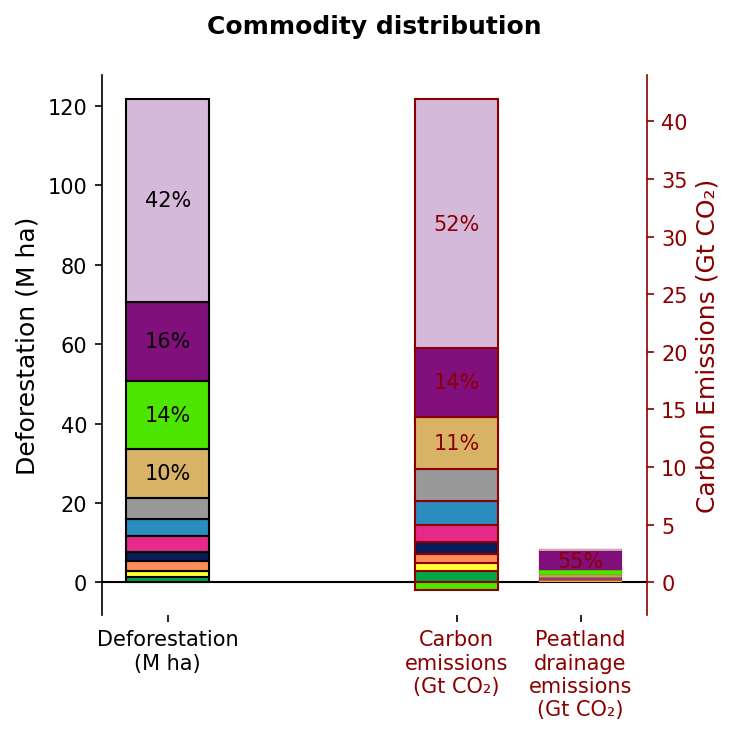

In [23]:
# Sort data ascending by deforestation
Country_group_sorted = Commodity_group.sort_values(
    by='Deforestation attribution, unamortized (ha)', ascending=True)

# Set up figure and axes
fig, ax1 = plt.subplots(figsize=(5, 5), dpi=150)
ax2 = ax1.twinx()

# Define positions and labels
x_labels = [
    'Deforestation\n(M ha)',
    'Carbon\nemissions\n(Gt CO₂)',
    'Peatland\ndrainage\nemissions\n(Gt CO₂)'
]
x = [0, 1.4, 2]
bar_width = 0.4

# Initialize stacking
bottom_deforestation_pos = bottom_deforestation_neg = 0
bottom_emissions_carbon_pos = bottom_emissions_carbon_neg = 0
bottom_emissions_peat_pos = bottom_emissions_peat_neg = 0

# Totals for percentage calculation
total_deforestation = Commodity_group['Deforestation attribution, unamortized (ha)'].sum() / 1e6
total_carbon_emissions = Commodity_group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum() / 1000
total_peat_emissions = Commodity_group['Peatland drainage emissions (MtCO2)'].sum() / 1000

# Stack bars
for idx, row in Country_group_sorted.iterrows():
    deforestation_val = row['Deforestation attribution, unamortized (ha)'] / 1e6
    carbon_val = row['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] / 1000
    peat_val = row['Peatland drainage emissions (MtCO2)'] / 1000

    # Deforestation
    if deforestation_val >= 0:
        ax1.bar(x[0], deforestation_val, bottom=bottom_deforestation_pos,
                color=row['Color'], edgecolor='black', width=bar_width)
        center_deforestation = bottom_deforestation_pos + deforestation_val / 2
        bottom_deforestation_pos += deforestation_val
    else:
        ax1.bar(x[0], deforestation_val, bottom=bottom_deforestation_neg,
                color=row['Color'], edgecolor='black', width=bar_width)
        center_deforestation = bottom_deforestation_neg + deforestation_val / 2
        bottom_deforestation_neg += deforestation_val

    # Carbon emissions
    if carbon_val >= 0:
        ax2.bar(x[1], carbon_val, bottom=bottom_emissions_carbon_pos,
                color=row['Color'], edgecolor='#8b0000', width=bar_width)
        center_carbon = bottom_emissions_carbon_pos + carbon_val / 2
        bottom_emissions_carbon_pos += carbon_val
    else:
        ax2.bar(x[1], carbon_val, bottom=bottom_emissions_carbon_neg,
                color=row['Color'], edgecolor='#8b0000', width=bar_width)
        center_carbon = bottom_emissions_carbon_neg + carbon_val / 2
        bottom_emissions_carbon_neg += carbon_val

    # Peat emissions
    if peat_val >= 0:
        ax2.bar(x[2], peat_val, bottom=bottom_emissions_peat_pos,
                color=row['Color'], edgecolor='#8b0000', width=bar_width, lw = 0.1)
        center_peat = bottom_emissions_peat_pos + peat_val / 2
        bottom_emissions_peat_pos += peat_val
    else:
        ax2.bar(x[2], peat_val, bottom=bottom_emissions_peat_neg,
                color=row['Color'], edgecolor='#8b0000', width=bar_width, lw = 0.1)
        center_peat = bottom_emissions_peat_neg + peat_val / 2
        bottom_emissions_peat_neg += peat_val
        
        
    # Calculate percentages
    pct_deforestation = (deforestation_val / total_deforestation) * 100
    pct_carbon = (carbon_val / total_carbon_emissions) * 100
    pct_peat = (peat_val / total_peat_emissions) * 100

    # Annotate if >=10%
    if abs(pct_deforestation) >= 10:
        ax1.text(x[0], center_deforestation, f"{int(round(pct_deforestation))}%", ha='center', va='center', fontsize=10, color='black')
    if abs(pct_carbon) >= 10:
        ax2.text(x[1], center_carbon, f"{int(round(pct_carbon))}%", ha='center', va='center', fontsize=10, color='#8b0000')
    if abs(pct_peat) >= 50:
        ax2.text(x[2], center_peat, f"{int(round(pct_peat))}%", ha='center', va='center', fontsize=10, color='#8b0000')
        

# Set x-ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)
ax2.set_yticks([0,5,10,15,20,25,30,35,40])
# Axis labels
ax1.set_ylabel('Deforestation (M ha)', fontsize=12)
ax2.set_ylabel('Carbon Emissions (Gt CO₂)', fontsize=12, color='#8b0000')
ax2.tick_params(axis='y', colors='#8b0000')
ax2.yaxis.label.set_color('#8b0000')
ax1.set_ylim((ax2.get_ylim()[0]-0)*(0-ax1.get_ylim()[1])/(0-ax2.get_ylim()[1]), )
ax1.axhline(0, lw =1 , color = 'black')

label_colors = ['black', '#8b0000', '#8b0000']
for txt, col in zip(ax1.get_xticklabels(), label_colors):
    txt.set_color(col)
        
# Style spines
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('#8b0000')

# Title
plt.title('Commodity distribution', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

fig.savefig('/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure3_b.svg')

In [24]:
Selected_data = Singh_et_al.groupby(['Commodity group', 'Commodity']).sum().reset_index()[['Commodity group', 'Commodity',
                                                                                                            'Deforestation attribution, unamortized (ha)', 
                                                                                                            'Deforestation emissions excl. peat drainage, unamortized (MtCO2)']]


In [25]:
# Here's how you'd transform the 'Commodity' column:
Commodities_to_keep = ['Cattle meat', 'Cocoa beans', 'Coffee, green', 'Natural rubber in primary forms', 'Oil palm fruit', 'Soya beans', 'Cassava, fresh', 'Maize (corn)', 'Rice']

Selected_data = Selected_data.loc[Selected_data['Commodity'].isin(Commodities_to_keep)]
Selected_data

,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)"
5,Cereals,Maize (corn),5.210466e+06,2181.134183
10,Cereals,Rice,4.336381e+06,1323.944384
15,Edible roots and tubers with high starch or in...,"Cassava, fresh",4.153056e+06,2113.982422
28,Fibre crops,Natural rubber in primary forms,1.564009e+06,471.304327
113,Oilseeds and oleaginous fruits,Oil palm fruit,1.076422e+07,3081.660034
121,Oilseeds and oleaginous fruits,Soya beans,6.161078e+06,1857.256608
125,Pasture,Cattle meat,4.850530e+07,20513.008204
144,"Stimulant, spice and aromatic crops",Cocoa beans,2.240279e+06,913.531748
145,"Stimulant, spice and aromatic crops","Coffee, green",1.142700e+06,235.149381


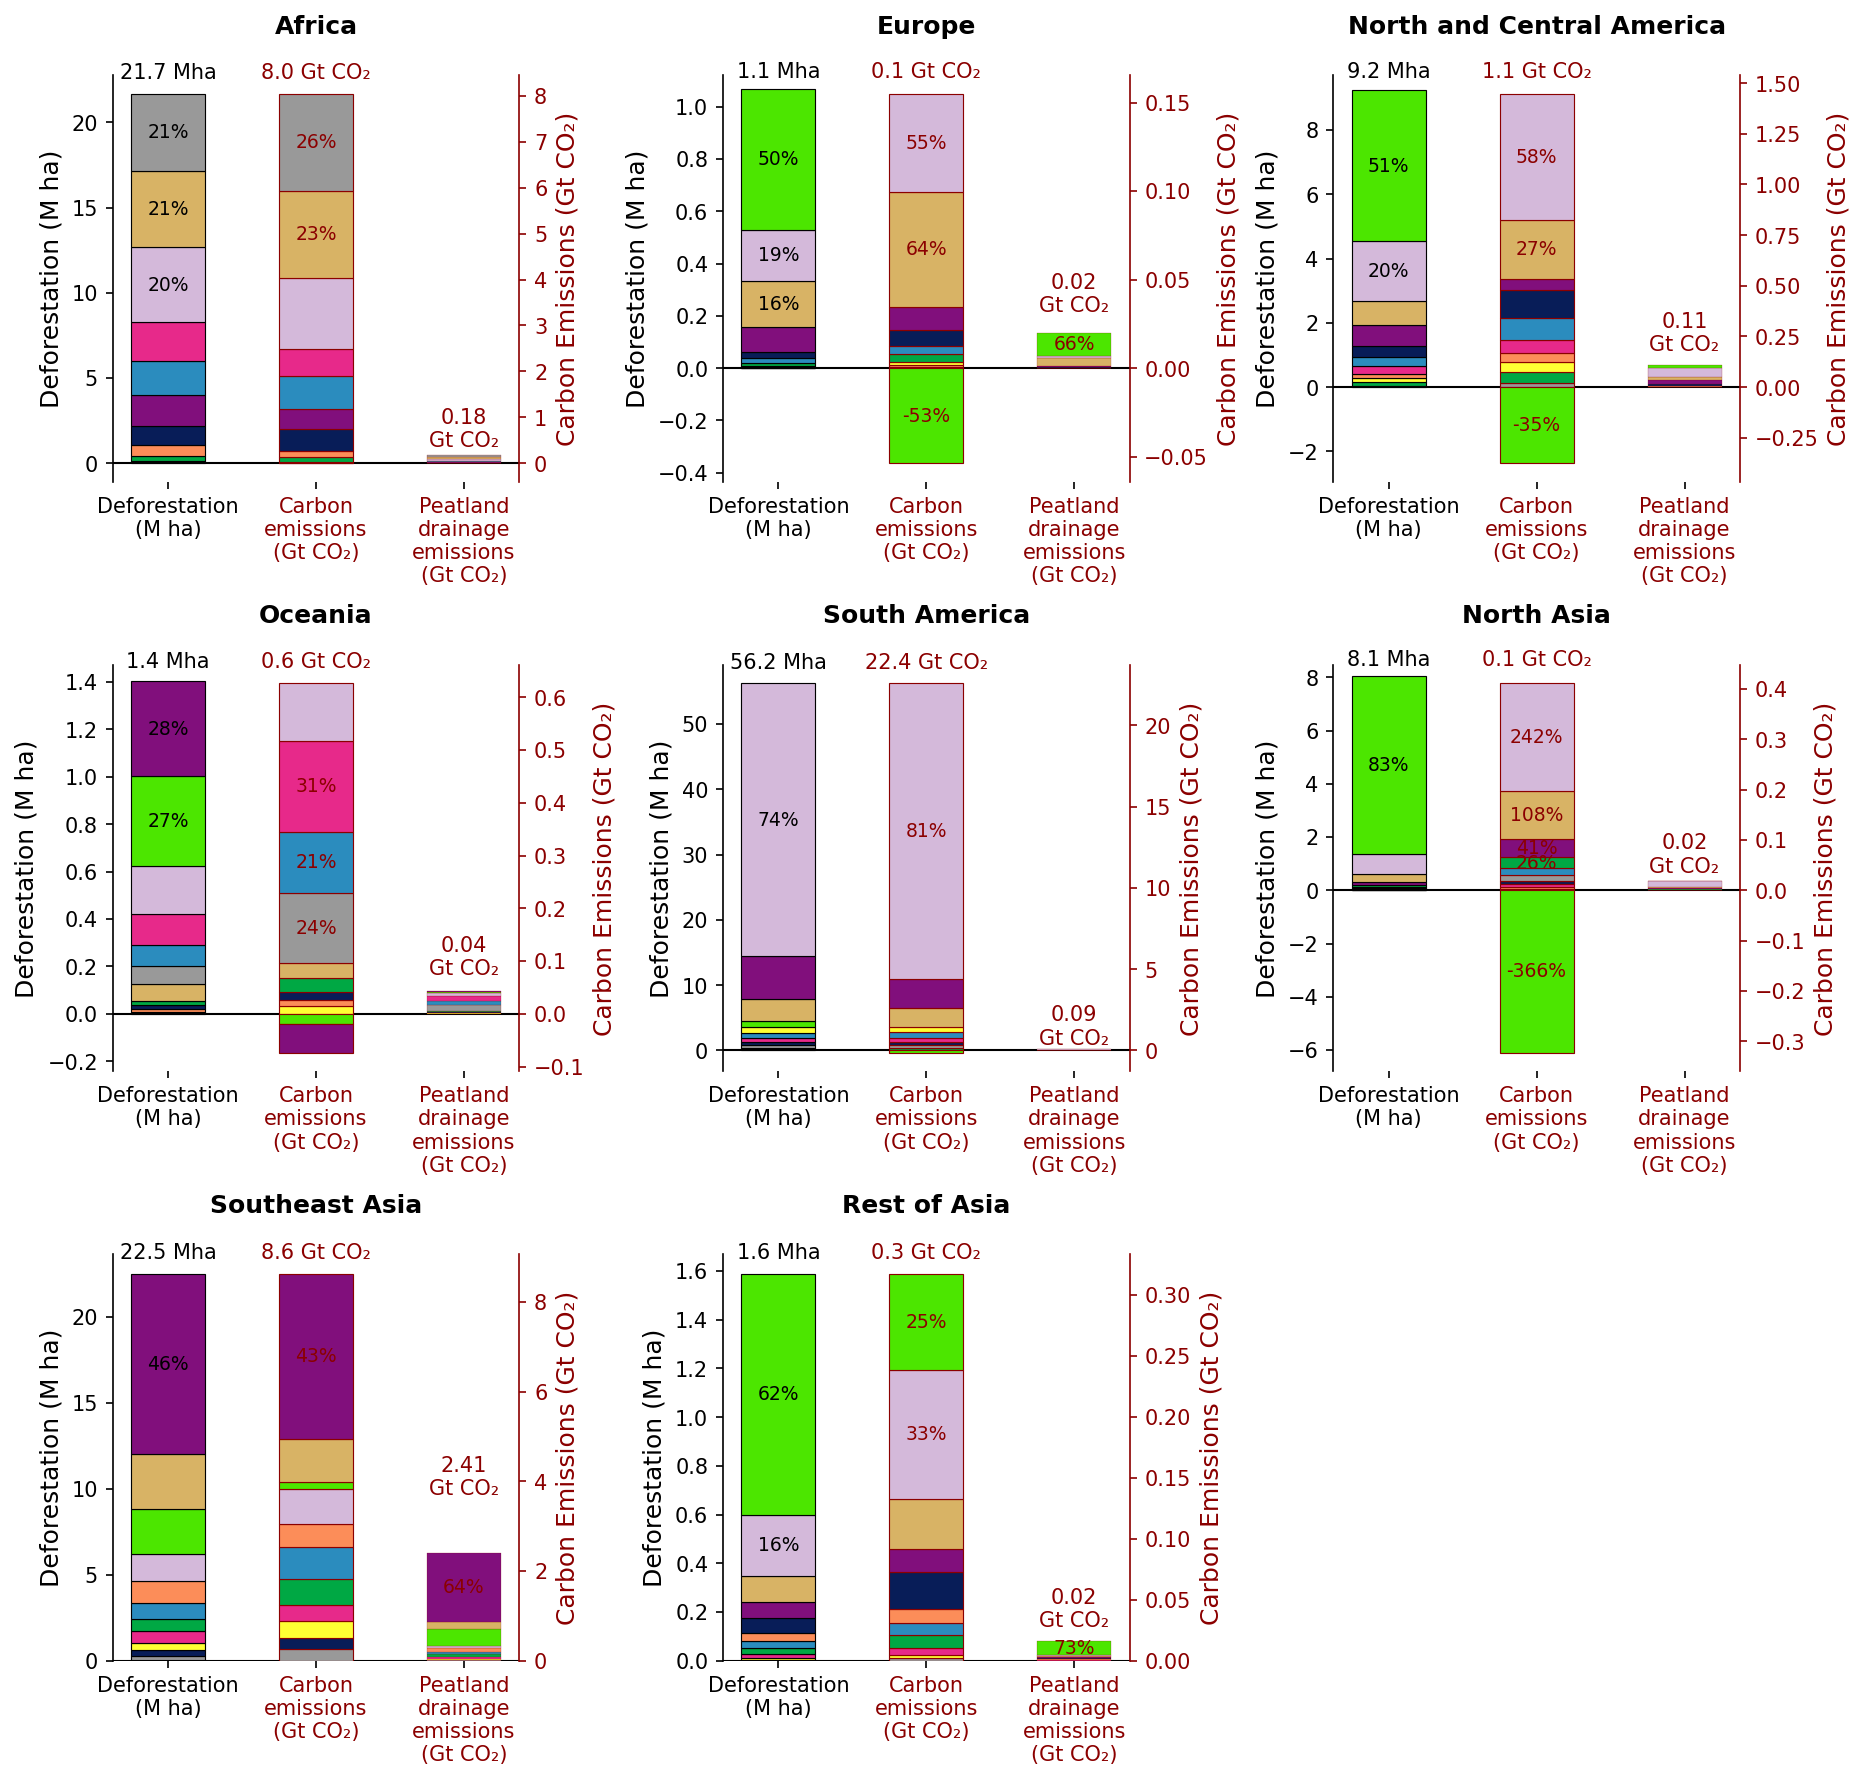

In [55]:
# Define the number of rows and columns for the subplots
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14), dpi=150,
                         gridspec_kw={'hspace': 0.45, 'wspace': 0.50})

groups = [
    'Africa', 'Europe', 'North and Central America', 'Oceania',
    'South America', 'North Asia', 'Southeast Asia', 'Rest of Asia'
]

for i, group in enumerate(groups):
    # pick the right axes cell
    ax1 = axes[i // ncols, i % ncols]
    ax2 = ax1.twinx()  # shared x-axis

    Selected_data = Singh_et_al.loc[
        Singh_et_al['Continent/Country group'] == group
    ].groupby(['Commodity group', 'Commodity']).sum().reset_index()[[
        'Commodity group', 'Commodity',
        'Deforestation attribution, unamortized (ha)',
        'Deforestation emissions excl. peat drainage, unamortized (MtCO2)',
        'Peatland drainage emissions (MtCO2)'
    ]]

    Commodity_group = Selected_data.groupby(['Commodity group']).sum().reset_index()
    Commodity_group['Color'] = Commodity_group['Commodity group'].map(
        Commodity_group_color.set_index('Commodity group')['Color']
    )
    Commodity_group = Commodity_group.set_index('Commodity group') \
        .reindex(index=Commodity_group_color['Commodity group']) \
        .reset_index()

    # Sort data ascending by deforestation
    Country_group_sorted = Commodity_group.sort_values(
        by='Deforestation attribution, unamortized (ha)', ascending=True
    )

    # Define positions and labels
    x_labels = [
        'Deforestation\n(M ha)',
        'Carbon\nemissions\n(Gt CO₂)',
        'Peatland\ndrainage\nemissions\n(Gt CO₂)'
    ]
    x = [0, 1, 2]
    bar_width = 0.5

    # Initialize stacking
    bottom_deforestation_pos = bottom_deforestation_neg = 0
    bottom_emissions_carbon_pos = bottom_emissions_carbon_neg = 0
    bottom_emissions_peat_pos = bottom_emissions_peat_neg = 0

    # Totals for percentage calculation
    total_deforestation = Commodity_group['Deforestation attribution, unamortized (ha)'].sum() / 1e6
    total_carbon_emissions = Commodity_group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum() / 1000
    total_peat_emissions = Commodity_group['Peatland drainage emissions (MtCO2)'].sum() / 1000

    # Stack bars
    for idx, row in Country_group_sorted.iterrows():
        deforestation_val = row['Deforestation attribution, unamortized (ha)'] / 1e6
        carbon_val = row['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] / 1000
        peat_val = row['Peatland drainage emissions (MtCO2)'] / 1000

        # Deforestation
        if deforestation_val >= 0:
            ax1.bar(x[0], deforestation_val, bottom=bottom_deforestation_pos,
                    color=row['Color'], edgecolor='black', width=bar_width, lw = 0.55)
            center_deforestation = bottom_deforestation_pos + deforestation_val / 2
            bottom_deforestation_pos += deforestation_val
        else:
            ax1.bar(x[0], deforestation_val, bottom=bottom_deforestation_neg,
                    color=row['Color'], edgecolor='black', width=bar_width, lw = 0.55)
            center_deforestation = bottom_deforestation_neg + deforestation_val / 2
            bottom_deforestation_neg += deforestation_val

        # Carbon emissions
        if carbon_val >= 0:
            ax2.bar(x[1], carbon_val, bottom=bottom_emissions_carbon_pos,
                    color=row['Color'], edgecolor='#8b0000', width=bar_width, lw = 0.55)
            center_carbon = bottom_emissions_carbon_pos + carbon_val / 2
            bottom_emissions_carbon_pos += carbon_val
        else:
            ax2.bar(x[1], carbon_val, bottom=bottom_emissions_carbon_neg,
                    color=row['Color'], edgecolor='#8b0000', width=bar_width, lw = 0.55)
            center_carbon = bottom_emissions_carbon_neg + carbon_val / 2
            bottom_emissions_carbon_neg += carbon_val

        # Peat emissions
        if peat_val >= 0:
            ax2.bar(x[2], peat_val, bottom=bottom_emissions_peat_pos,
                    color=row['Color'], edgecolor='#8b0000', width=bar_width, lw = 0.1)
            center_peat = bottom_emissions_peat_pos + peat_val / 2
            bottom_emissions_peat_pos += peat_val
        else:
            ax2.bar(x[2], peat_val, bottom=bottom_emissions_peat_neg,
                    color=row['Color'], edgecolor='#8b0000', width=bar_width, lw = 0.1)
            center_peat = bottom_emissions_peat_neg + peat_val / 2
            bottom_emissions_peat_neg += peat_val

        # Calculate percentages
        pct_deforestation = (deforestation_val / total_deforestation) * 100
        pct_carbon = (carbon_val / total_carbon_emissions) * 100
        pct_peat = (peat_val / total_peat_emissions) * 100

        # Annotate if >=10% (or 50% for peat)
        if abs(pct_deforestation) >= 15:
            ax1.text(x[0], center_deforestation, f"{int(round(pct_deforestation))}%",
                     ha='center', va='center', fontsize=9, color='black')
        if abs(pct_carbon) >= 20:
            ax2.text(x[1], center_carbon, f"{int(round(pct_carbon))}%",
                     ha='center', va='center', fontsize=9, color='#8b0000')
        if group in ['South America', 'North Asia']:
            continue
        else:
            if (abs(pct_peat) >= 40):
                ax2.text(x[2], center_peat, f"{int(round(pct_peat))}%",
                         ha='center', va='center', fontsize=9, color='#8b0000')

    # Set x-ticks and labels
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels)
    
    label_colors = ['black', '#8b0000', '#8b0000']
    for txt, col in zip(ax1.get_xticklabels(), label_colors):
        txt.set_color(col)

    # Axis labels
    ax1.set_ylabel('Deforestation (M ha)', fontsize=12)
    ax2.set_ylabel('Carbon Emissions (Gt CO₂)', fontsize=12, color='#8b0000')
    ax2.tick_params(axis='y', colors='#8b0000')
    ax2.yaxis.label.set_color('#8b0000')

    # Zero line
    ax1.axhline(0, lw=1, color='black')
    ax1.set_ylim((ax2.get_ylim()[0]-0)*(0-ax1.get_ylim()[1])/(0-ax2.get_ylim()[1]), )


    # Style spines
    for spine in ax1.spines.values():
        spine.set_visible(False)
    for spine in ax2.spines.values():
        spine.set_visible(False)
    ax1.spines['left'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    ax2.spines['right'].set_color('#8b0000')

    # Title
    ax1.set_title(group, fontweight='bold', pad=20)
    
    # Annotate total deforestation (M ha) above the first bar
    ax1.text(
        x[0],
        ax1.get_ylim()[1] * 0.98,
        f"{total_deforestation:.1f} Mha",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

    # Annotate total carbon emissions (Gt CO₂) above the second bar
    ax2.text(
        x[1],
        ax2.get_ylim()[1] * 0.98,
        f"{total_carbon_emissions:.1f} Gt CO₂",
        ha='center',
        va='bottom',
        fontsize=10,
        color='#8b0000'
    )

    # Annotate total peatland drainage emissions (Gt CO₂) above the third bar
    ax2.text(
        x[2],
        total_peat_emissions * 1.5,
        f"{total_peat_emissions:.2f}\nGt CO₂",
        ha='center',
        va='bottom',
        fontsize=10,
        color='#8b0000'
    )

# Leave the 9th cell blank
axes[2, 2].axis('off')

plt.show()
fig.savefig('/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Supplementary Figure2.svg')

0.3333556957568764

In [58]:
# Custom function to calculate the weighted mean
def weighted_mean(group):
    quality_index = group['Quality Index']
    weights = group['Deforestation attribution, unamortized (ha)']
    try:
        return (quality_index * weights).sum() / weights.sum()
    except ZeroDivisionError:
        return np.nan

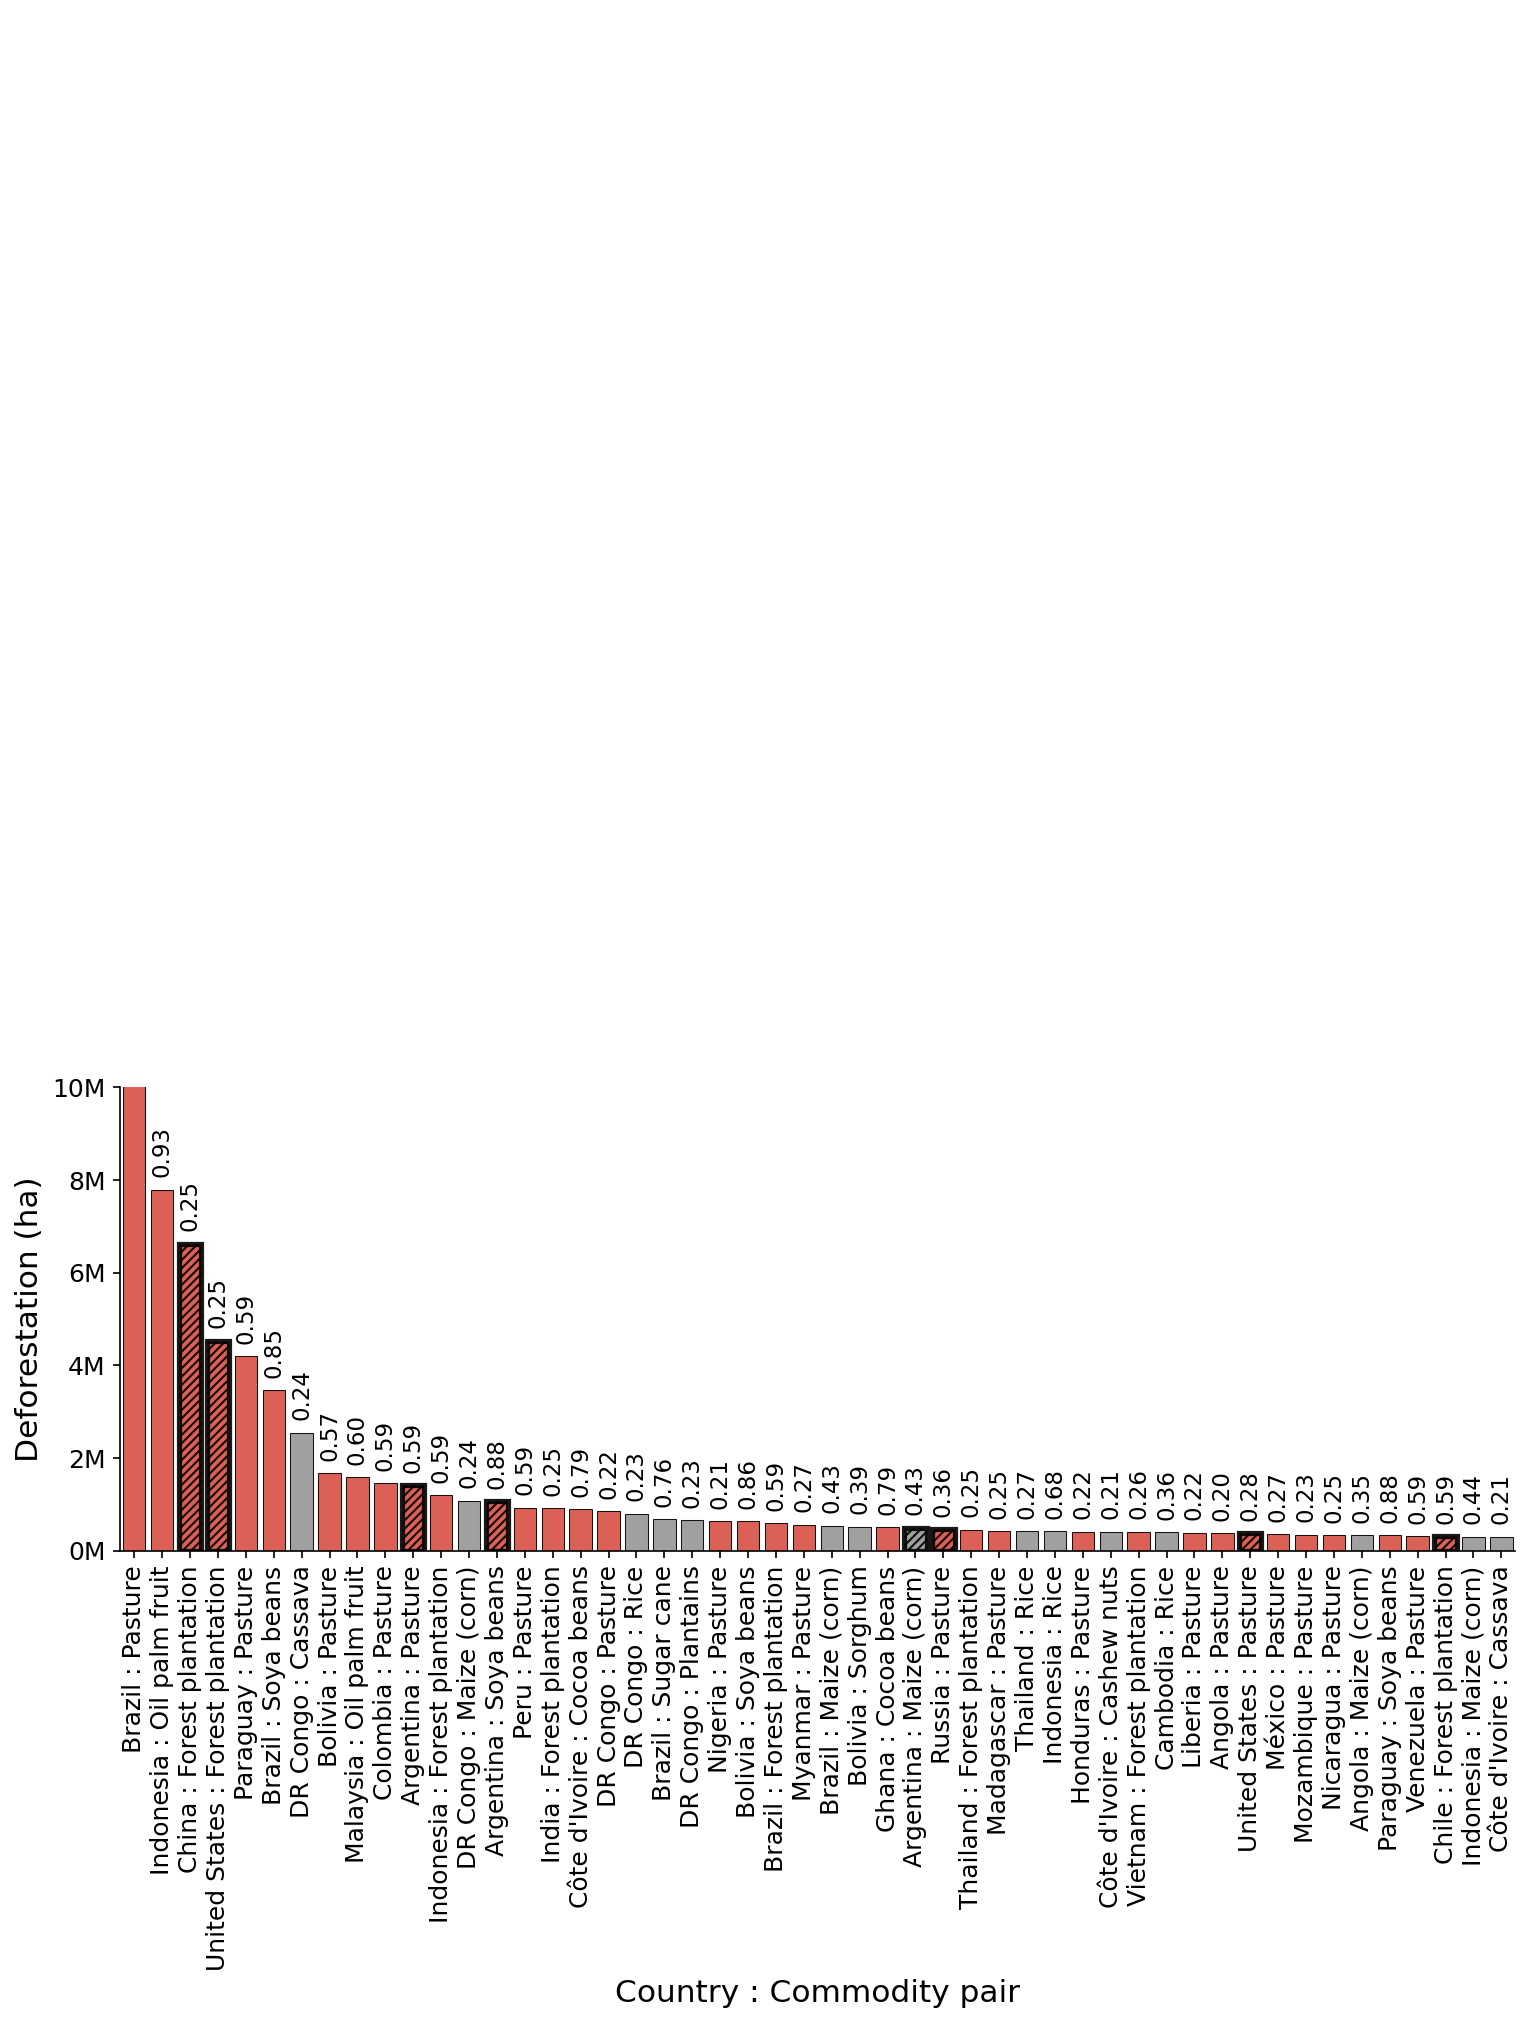

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker


Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Cattle meat', 'Pasture', regex=True)
Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Leather', 'Pasture', regex=True)

Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('^Forest plantation.*', 'Forest plantation', regex=True)

Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Natural rubber in primary forms', 'Rubber', regex=True)

Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('^Cassava.*', 'Cassava', regex=True)
Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Beans, dry', 'Dry beans', regex=True)
Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Coffee, green', 'Coffee', regex=True)
Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Plantains and cooking bananas', 'Plantains', regex=True)
Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Groundnuts, excluding shelled', 'Groundnuts', regex=True)
Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Maize (corn)', 'Maize', regex=True)

Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Coconuts, in shell', 'Coconuts', regex=True)
Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Cashew nuts, in shell', 'Cashew nuts', regex=True)
Singh_et_al['Commodity'] = Singh_et_al['Commodity'].str.replace('Seed cotton, unginned', 'Cotton', regex=True)


# Plotting the top commodities
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9), dpi=150)
ax = axes[0]  # we’ll use only the first axes and delete the second
kwargs = {'alpha': 0.9, 'linestyle': '-', 'linewidth': 0.5, 'edgecolor': 'k'}

# Aggregate and pick top 50
Selected_data = (
    Singh_et_al[['Producer country', 'Commodity',
                 'Deforestation attribution, unamortized (ha)', 'Quality Index']]
    .groupby(['Producer country', 'Commodity'])
    .apply(lambda grp: pd.Series({
        'Deforestation attribution, unamortized (ha)': grp['Deforestation attribution, unamortized (ha)'].sum(),
        'Quality Index': weighted_mean(grp)
    }))
    .reset_index()
    .sort_values(by='Deforestation attribution, unamortized (ha)', ascending=False)
    .head(50)
)

# Shorten the DRC name
Selected_data.loc[
    Selected_data['Producer country'] == 'Democratic Republic of the Congo',
    'Producer country'
] = 'DR Congo'

# Create the x-axis labels
Selected_data['Pair'] = (
    Selected_data['Producer country'].astype(str)
    + ' : ' +
    Selected_data['Commodity'].astype(str)
)

# Highlight certain commodities in red
EUDR_commodities = [
    'Soya beans', 'Pasture', 'Oil palm fruit', 
    'Forest plantation', 'Cocoa beans', 'Coffee', 'Rubber'
]
palette = {
    pair: '#ef3b2c' if pair.split(' : ')[1] in EUDR_commodities else '#969696'
    for pair in Selected_data['Pair']
}

# Main barplot
barplot = sns.barplot(
    y='Deforestation attribution, unamortized (ha)',
    x='Pair',
    data=Selected_data,
    palette=palette,
    ax=ax,
    **kwargs
)

# Hatch bars for non-tropical countries
non_tropicals = ['United States', 'China', 'Argentina', 'Chile', 'Russia']
for bar, country in zip(barplot.patches, Selected_data['Producer country']):
    if country in non_tropicals:
        bar.set_hatch('//////')
        bar.set_linewidth(2.5)

# Annotate Quality Index above each bar
for patch, qidx in zip(barplot.patches, Selected_data['Quality Index']):
    height = patch.get_height() + 6e5
    ax.annotate(
        f'{qidx:.2f}',
        (patch.get_x() + patch.get_width() / 2, height),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=11,
        rotation=90
    )

# Format y-axis in millions
def million_formatter(y, pos):
    return f'{y/1e6:.0f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(million_formatter))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# Axis labels and ticks
ax.set_xlabel('Country : Commodity pair', fontsize=15)
ax.set_ylabel('Deforestation (ha)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='x', rotation=90)

# Hide top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Remove the (unused) second subplot
axes[1].remove()

# Set y-limits explicitly
ax.set_ylim(0, 1e7)

plt.tight_layout()
plt.show()


In [61]:
Selected_data.to_excel('/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Source_Fig_5b.xlsx')

In [20]:
Year = '(2001-2022)'
Singh_et_al = pd.read_excel(f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx', sheet_name = 'Deforestation attribution', engine='openpyxl')

In [4]:
GFW_Treecover_loss = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'GFW-Tree cover loss', engine='openpyxl')
GFW_Intact = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'GFW-Intact', engine='openpyxl')
GFW_Primary_forest = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'GFW-Primary forest', engine='openpyxl')
FRA = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'FRA', engine='openpyxl')
GFW_Curtis = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'GFW-Curtis et al.', engine='openpyxl')

In [5]:
WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'WRI 2019', engine='openpyxl')

In [6]:
Doubling_feng_et_al = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'Doubling carbon', engine='openpyxl')

In [3]:
new_Country_code = {'Sao Tome and Principe':'São Tomé and Príncipe', 'Eswatini':'Swaziland', 'Antigua':'Antigua and Barbuda',
                    'Cote dIvoire': 'Côte d\'Ivoire', 'Mexico': 'México', 'Congo': 'Republic of the Congo', 'Viet Nam': 'Vietnam', 
                    'DR Congo': 'Democratic Republic of the Congo', 'US Virgin Islands':'Virgin Islands, U.S.'}
new_FAO_code = {#'Forest plantation': 'Forest plantation (Unclassified)',
 'Almonds, with shell': 'Almonds, in shell', 
 'Anise, badian, fennel, coriander': 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
 'Berries nes': 'Other berries and fruits of the genus vaccinium n.e.c.', 
 'Fruit, citrus nes': 'Other citrus fruit, n.e.c.',
 'Fruit, fresh nes': 'Other fruits, n.e.c.', 
 'Fruit, stone nes': 'Other stone fruits',
 'Maize': 'Maize (corn)', 
 'Melons, other (inc.cantaloupes)': 'Cantaloupes and other melons',
 'Nuts nes': 'Other nuts (excluding wild edible nuts and groundnuts), in shell, n.e.c.',
 'Onions, dry': 'Onions and shallots, dry (excluding dehydrated)',
 'Pistachios': 'Pistachios, in shell', 
 'Pulses nes': 'Other pulses n.e.c.', 
 'Rice, paddy': 'Rice', 
 'Seed cotton': 'Seed cotton, unginned',
 'Spices nes': 'Other stimulant, spice and aromatic crops, n.e.c.', 
 'Vegetables, fresh nes': 'Other vegetables, fresh n.e.c.',
 'Walnuts, with shell': 'Walnuts, in shell',
 'Bastfibres, other': 'Kenaf, and other textile bast fibres, raw or retted',
 'Cabbages and other brassicas': 'Cabbages',
 'Cashew nuts, with shell': 'Cashew nuts, in shell',
 'Cassava': 'Cassava, fresh',
 'Castor oil seed': 'Castor oil seeds',
 'Cocoa, beans': 'Cocoa beans', 
 'Flax fibre and tow': 'Flax, processed but not spun',
 'Groundnuts, with shell': 'Groundnuts in shell',
 'Onions, shallots, green': 'Onions and shallots, green',
 'Sisal': 'Sisal, raw', 
 'Soybeans': 'Soya beans',
 'Tobacco, unmanufactured': 'Unmanufactured tobacco',
 'Broad beans, horse beans, dry': 'Broad beans and horse beans, dry',
 'Cereals nes': 'Cereals n.e.c.',
 'Chick peas': 'Chick peas, dry',
 'Chillies and peppers, dry': 'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw', 
 'Chillies and peppers, green': 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
 'Fibre crops nes': 'Other fibre crops, raw, n.e.c.', 
 'Garlic': 'Green garlic',
 'Grapefruit (inc. pomelos)': 'Pomelos and grapefruits',
 'Hops': 'Hop cones',
 'Lentils': 'Lentils, dry', 
 'Mangoes, mangosteens, guavas': 'Mangoes, guavas and mangosteens',
 'Maté': 'Maté leaves',
 'Rapeseed': 'Rape or colza seed', # Some difference between how it is reported on the CPC sheet and FAO website
 'Tangerines, mandarins, clementines, satsumas': 'Tangerines, mandarins, clementines',
 'Tea': 'Tea leaves',
 'Cherries, sour': 'Sour cherries',
 'Fruit, tropical fresh nes': 'Other fruits, n.e.c.',
 'Hazelnuts, with shell': 'Hazelnuts, in shell', 
 'Taro (cocoyam)': 'Taro',
 'Maize, green': 'Green corn (maize)', 
 'Pigeon peas': 'Pigeon peas, dry', 
 'Plantains and others': 'Plantains and cooking bananas',
 'Coconuts': 'Coconuts, in shell', 
 'Oilseeds nes': 'Other oil seeds, n.e.c.', 
 'Pepper (piper spp.)': 'Pepper (Piper spp.), raw', 
 'Bambara beans': 'Bambara beans, dry', 
 'Coir': 'Coir, raw',
 'Ginger': 'Ginger, raw', 
 'Hemp tow waste': 'True hemp, raw or retted', 
 'Jute': 'Jute, raw or retted', 
 'Rubber, natural': 'Natural rubber in primary forms',
 'Sugar crops nes': 'Other sugar crops n.e.c.', 
 'Roots and tubers nes': 'Edible roots and tubers with high starch or inulin content, n.e.c., fresh', 
 'Yautia (cocoyam)': 'Yautia',
 'Chestnut': 'Chestnuts, in shell', 
 'Pyrethrum, dried': 'Pyrethrum, dried flowers', 
 'Vegetables, leguminous nes': 'Other green leguminous vegetables', 
 'Guarana': 'Other stimulant, spice and aromatic crops, n.e.c.', 
 'Ramie': 'Ramie, raw or retted', 
 'Nutmeg, mace and cardamoms': 'Nutmeg, mace, cardamoms, raw', 
 'Brazil nuts, with shell': 'Brazil nuts, in shell', 
 'Leeks, other alliaceous vegetables': 'Leeks and other alliaceous vegetables',
 'Agave fibres nes': 'Agave fibres, raw, n.e.c.', 
 'Cinnamon (cannella)': 'Cinnamon and cinnamon-tree flowers, raw', 
 'Cloves': 'Cloves (whole stems), raw', 
 'Vanilla':'Vanilla, raw',
 'Manila fibre (abaca)': 'Abaca, manila hemp, raw', 
 'Carobs': 'Locust beans (carobs)', 
 'Fruit, pome nes': 'Other fruits, n.e.c.', 
 'Peppermint': 'Peppermint, spearmint',
 'Jojoba seed': 'Jojoba seeds', 
 'Grain, mixed': 'Mixed grain',
 'Beans, green': 'Other beans, green'}
Continent = pd.read_excel(f'{home_folder}{Simulation_version}/Supplementary_data-DeDuCE v1.xlsx', 'Lookup-Country (GADM)', engine='openpyxl')
Crop_category = pd.read_excel(f'{home_folder}{Simulation_version}/Supplementary_data-DeDuCE v1.xlsx', 'Lookup-FAO commodity', engine='openpyxl')

Pendrill_attribution = pd.read_excel(home_folder+'Pendrill et al 2022 - Deforestation risk embodied in production and consumption - v1.1.xlsx', 'Deforestation attribution', engine='openpyxl')
Pendrill_attribution['Commodity'] = Pendrill_attribution['Commodity'].replace(new_FAO_code)
Pendrill_attribution['Producer country'] = Pendrill_attribution['Producer country'].replace(new_Country_code)
Pendrill_attribution['Continent/Country group'] = Pendrill_attribution['Producer country'].map(Continent.set_index('COUNTRY')['COUNTRY GROUP'])
Pendrill_attribution['Commodity group'] = Pendrill_attribution['Commodity'].map(Crop_category.set_index('Item name')['Group'])
Pendrill_attribution = Pendrill_attribution.rename(columns= {'Deforestation emissions excl. peat drainage (MtCO2)': 'Deforestation emissions excl. peat drainage, amortized (MtCO2)'})
Pendrill_attribution = Pendrill_attribution.groupby(['Continent/Country group', 'ISO', 'Producer country', 'Year', 'Commodity group', 'Commodity']).sum().reset_index()
Pendrill_attribution = Pendrill_attribution[['Continent/Country group', 'ISO', 'Producer country', 'Year', 'Commodity group', 'Commodity',
                                             'Deforestation attribution, unamortized (ha)', 'Deforestation risk, amortized (ha)',
                                             'Deforestation emissions excl. peat drainage, amortized (MtCO2)']]


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [59]:
round(Singh_et_al.loc[(Singh_et_al['Commodity'] == 'Cocoa beans') &
                      (Singh_et_al['Producer country'] == 'Ghana') &
                      (Singh_et_al['Year'] >= 2001) & (Singh_et_al['Year'] <= 2019), 
                      'Deforestation attribution, unamortized (ha)'].sum())

436794

In [60]:
834594+436794

1271388

In [9]:
Pendrill_attribution_emission = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'Pendrill', engine='openpyxl')

In [10]:
Crippa_et_al = pd.read_excel(f'{home_folder}{Simulation_version}/Comparison.xlsx', sheet_name = 'Crippa et al.', engine='openpyxl')

In [11]:
Hoang_and_Kanemoto_atttribution = pd.read_csv(f'{home_folder}{Simulation_version}/Hoang and Kanemoto_commodity.csv')
Hoang_and_Kanemoto_atttribution = Hoang_and_Kanemoto_atttribution.rename(columns = {'year': 'Year'})
Hoang_and_Kanemoto_atttribution = Hoang_and_Kanemoto_atttribution.groupby('Year').sum().reset_index()
Hoang_and_Kanemoto_atttribution['Year'] = Hoang_and_Kanemoto_atttribution['Year']+2000

In [12]:
Total_tree_cover_loss = pd.read_csv(f'{home_folder}{Simulation_version}/treecover_loss_by_region__ha.csv')
Total_tree_cover_loss = Total_tree_cover_loss.rename(columns = {'umd_tree_cover_loss__year': 'Year'})
Total_tree_cover_loss = Total_tree_cover_loss.groupby('Year').sum().reset_index()

In [13]:
Singh_et_al['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] = Singh_et_al['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] + Singh_et_al['Peatland drainage emissions (MtCO2)']

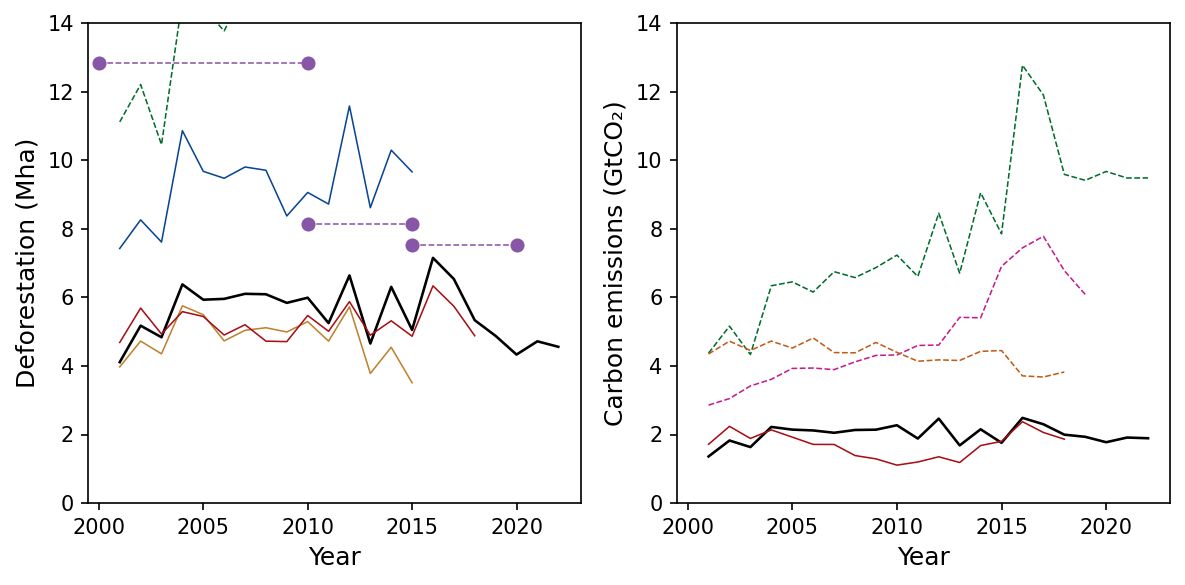

In [21]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), dpi=150)

ax[0].plot(Singh_et_al.groupby('Year').sum().reset_index()['Year'], 
           Singh_et_al.groupby('Year').sum().reset_index()['Deforestation attribution, unamortized (ha)']/10**6, lw = 1.25, color = 'black')
ax[0].plot(GFW_Curtis.groupby('Year').sum().reset_index()['Year'], 
           GFW_Curtis.groupby('Year').sum().reset_index()['Loss (ha)']/10**6, lw = 0.75, color = '#006d2c', ls = '--')

"""
ax[0].plot(GFW_Intact.groupby('Year').sum().reset_index()['Year'], 
           GFW_Intact.groupby('Year').sum().reset_index()['Loss (ha)']/10**6, lw = 0.75, color = '#045a8d', ls = '--')
ax[0].plot(GFW_Primary_forest.groupby('Year').sum().reset_index()['Year'], 
           GFW_Primary_forest.groupby('Year').sum().reset_index()['Loss (ha)']/10**6, lw = 0.75, color = '#006d2c', ls = '--')
"""
ax[0].plot(WRI['Year'], 
           WRI['Total']/10**6, lw = 0.75, color = '#bf812d')
ax[0].plot(Pendrill_attribution.groupby('Year').sum().reset_index()['Year'], 
           Pendrill_attribution.groupby('Year').sum().reset_index()['Deforestation attribution, unamortized (ha)']/10**6, lw = 0.75, 
           ls = '-', color = '#a50f15')
ax[0].plot(Hoang_and_Kanemoto_atttribution.groupby('Year').sum().reset_index()['Year'], 
           Hoang_and_Kanemoto_atttribution.groupby('Year').sum().reset_index()['production']*10**2/10**6, lw = 0.75, 
           ls = '-', color = '#084594')


# FRA
ax[0].plot(range(2000,2011), np.linspace(12825.53,12825.53,11)/10**3, ls = '--', lw = 0.75, color = '#8856a7')
ax[0].scatter(2000, 12825.53/10**3, lw = 0.75, color = '#8856a7')
ax[0].scatter(2010, 12825.53/10**3, lw = 0.75, color = '#8856a7')

ax[0].plot(range(2010,2016), np.linspace(8150.96,8150.96,6)/10**3, ls = '--', lw = 0.75, color = '#8856a7')
ax[0].scatter(2010, 8150.96/10**3, lw = 0.75, color = '#8856a7')
ax[0].scatter(2015, 8150.96/10**3, lw = 0.75, color = '#8856a7')

ax[0].plot(range(2015,2021), np.linspace(7514.42,7514.42,6)/10**3, ls = '--', lw = 0.75, color = '#8856a7')
ax[0].scatter(2015, 7514.42/10**3, lw = 0.75, color = '#8856a7')
ax[0].scatter(2020, 7514.42/10**3, lw = 0.75, color = '#8856a7')

ax[1].plot(Singh_et_al.groupby('Year').sum().reset_index()['Year'], 
           Singh_et_al.groupby('Year').sum().reset_index()['Deforestation emissions excl. peat drainage, unamortized (MtCO2)']/10**3, lw = 1.25, color = 'black')

ax[1].plot(GFW_Curtis.groupby('Year').sum().reset_index()['Year'], 
           GFW_Curtis.groupby('Year').sum().reset_index()['Total emissions (GtCO2-eq/yr)'], lw = 0.75, color = '#006d2c', ls = '--')
"""
ax[1].plot(GFW_Intact.groupby('Year').sum().reset_index()['Year'], 
           GFW_Intact.groupby('Year').sum().reset_index()['Emissions (MgCO2)']/10**9, lw = 0.75, color = '#045a8d', ls = '--')
ax[1].plot(GFW_Primary_forest.groupby('Year').sum().reset_index()['Year'], 
           GFW_Primary_forest.groupby('Year').sum().reset_index()['Emissions (MgCO2)']/10**9, lw = 0.75, color = '#006d2c', ls = '--')
"""
ax[1].plot(Pendrill_attribution_emission.groupby('Year').sum().reset_index()['Year'], 
           Pendrill_attribution_emission.groupby('Year').sum().reset_index()['Total emissions (MtCO2/yr)']/10**3, lw = 0.75, 
           ls = '-', color = '#a50f15')
ax[1].plot(Doubling_feng_et_al.groupby('Year').sum().reset_index()['Year'], 
           Doubling_feng_et_al.groupby('Year').sum().reset_index()['Emissions (MtCO2 yr-1)']/10**3, lw = 0.75, 
           ls = '--', color = '#c51b8a')
ax[1].plot(Crippa_et_al.groupby('Year').sum().reset_index()['Year'], 
           Crippa_et_al.groupby('Year').sum().reset_index()['Total emissions (MtCO2/yr)']/10**3, lw = 0.75, 
           ls = '--', color = '#bf5b17')

# Set up the legend for both plots
for i in range(2):
    #ax[i].spines[['right', 'top']].set_visible(False)
    #ax[i].set_xticks(fontsize = 12)
    ax[i].set_xlabel('Year', fontsize = 12)
    ax[i].set_xlim(1999.5,)
    ax[i].set_ylim(0,)
    ax[i].tick_params(which='both', labelsize=10)

ax[0].set_ylim(0,14)
ax[1].set_ylim(0,14)
ax[0].set_ylabel('Deforestation (Mha)', fontsize = 12)
ax[1].set_ylabel('Carbon emissions (GtCO₂)', fontsize = 12)
# Show the plot
plt.tight_layout()

plt.show()
#fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure3_ab.svg')

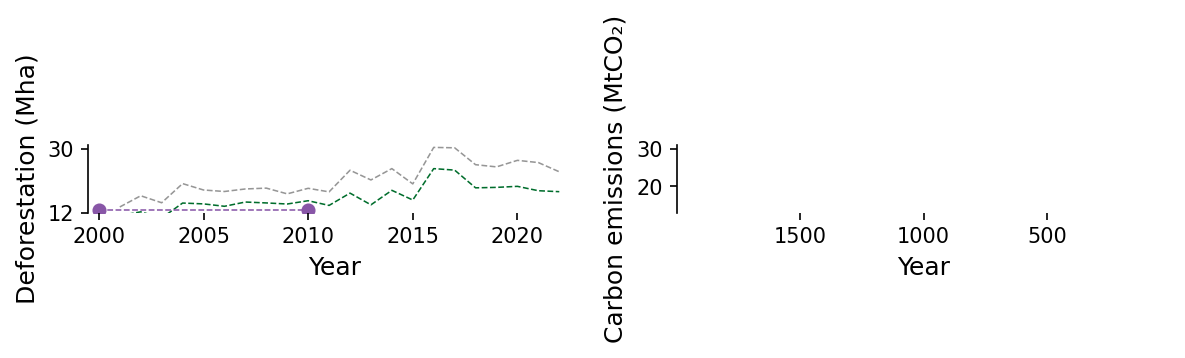

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 1.2), dpi=150)
ax[0].plot(Total_tree_cover_loss.groupby('Year').sum().reset_index()['Year'], 
           Total_tree_cover_loss.groupby('Year').sum().reset_index()['umd_tree_cover_loss__ha']/10**6, lw = 0.75, 
           ls = '--', color = '#969696')

# Set up the legend for both plots
for i in range(2):
    ax[i].spines[['right', 'top', 'bottom']].set_visible(False)
    #ax[i].set_xticks(fontsize = 12)
    ax[i].set_xlabel('Year', fontsize = 12)
    ax[i].set_xlim(1999.5,)
    ax[i].set_ylim(13,31)
    ax[i].tick_params(which='both', labelsize=10)

ax[0].plot(GFW_Curtis.groupby('Year').sum().reset_index()['Year'], 
           GFW_Curtis.groupby('Year').sum().reset_index()['Loss (ha)']/10**6, lw = 0.75, color = '#006d2c', ls = '--')

ax[0].plot(range(2000,2011), np.linspace(12825.53,12825.53,11)/10**3, ls = '--', lw = 0.75, color = '#8856a7')
ax[0].scatter(2000, 12825.53/10**3, lw = 0.75, color = '#8856a7')
ax[0].scatter(2010, 12825.53/10**3, lw = 0.75, color = '#8856a7')

ax[0].set_yticks([12, 30])
ax[0].set_ylabel('Deforestation (Mha)', fontsize = 12)
ax[1].set_ylabel('Carbon emissions (MtCO₂)', fontsize = 12)
# Show the plot
plt.tight_layout()

plt.show()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_3_a1.svg')

In [19]:
Crippa_et_al
# Step 3: Calculate the mean and standard deviation
mean_value = np.mean(Crippa_et_al.groupby(['Year']).sum()['Total emissions (MtCO2/yr)'].values)
std_deviation = np.std(Crippa_et_al.groupby(['Year']).sum()['Total emissions (MtCO2/yr)'].values)

# Print the results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 4332.45867565
Standard Deviation: 325.962673155327


In [462]:
Crippa_et_al
# Step 3: Calculate the mean and standard deviation
mean_value = np.mean([14600078.29, 15231990.77, 15138914.08, 15918888.52, 15877257.56, 16469165.85, 16135720.36, 16223553.15,
                      16654927.98, 16479289.9, 16456101.42,	16594125.37, 16726391.21, 17174019.62, 17307951.51, 16535326.52,
                      16610142.29, 16928777.01])
std_deviation = np.std([14600078.29, 15231990.77, 15138914.08, 15918888.52, 15877257.56, 16469165.85, 16135720.36, 16223553.15,
                      16654927.98, 16479289.9, 16456101.42,	16594125.37, 16726391.21, 17174019.62, 17307951.51, 16535326.52,
                      16610142.29, 16928777.01])

# Print the results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 16281256.745000001
Standard Deviation: 688605.2765698781


In [446]:
Singh_et_al.loc[(Singh_et_al['Commodity'] == 'Maize (corn)') & (Singh_et_al['Year'] == 2022) & (Singh_et_al['Producer country'] == 'Brazil')].sum()

Continent/Country group                                             South America
ISO                                                                           BRA
Producer country                                                           Brazil
Year                                                                         2022
Commodity group                                                           Cereals
Commodity                                                            Maize (corn)
Deforestation attribution, unamortized (ha)                          96809.854445
Deforestation risk, amortized (ha)                                   52709.637763
Deforestation emissions excl. peat drainage, unamortized (MtCO2)        26.843129
Deforestation emissions excl. peat drainage, amortized (MtCO2)          15.956018
Peatland drainage emissions (MtCO2)                                       0.04502
Deforestation emissions incl. peat drainage, amortized (MtCO2)          16.001038
Quality Index   

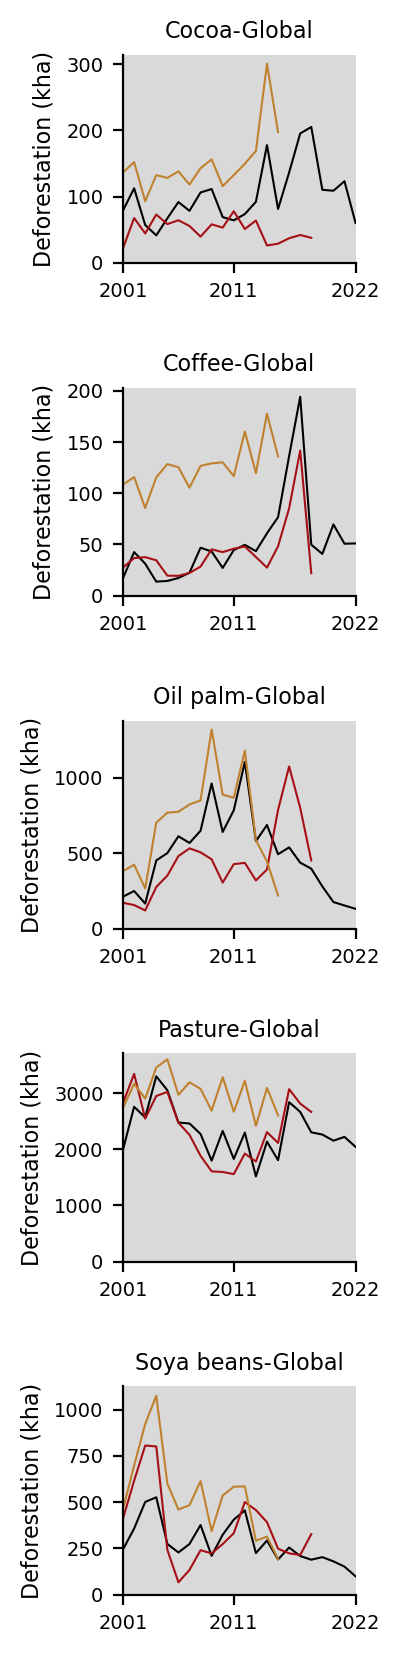

In [110]:
# Define the subplots
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(1.5,10), dpi=200,
                            gridspec_kw={'hspace': 0.6, 'wspace': 0.5})
plt.rc('font', size=12)

ax = ax.flatten()  # Flatten the array for easy iteration
i = 0; j = 0
for index, Commodity in enumerate(['Cocoa beans', 'Coffee, green', 'Oil palm fruit',  'Pasture', 'Soya beans']):
    
    Singh_et_al_selected = Singh_et_al.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity group'] == Commodity]
    else:
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity'] == Commodity]
    ax[index].plot(Singh_et_al_selected['Year'], Singh_et_al_selected['Deforestation attribution, unamortized (ha)']/10**3,
               lw = 0.75, color = 'black')

    
    Pendrill_attribution_selected = Pendrill_attribution.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity group'] == Commodity]
    else:
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity'] == Commodity]
    ax[index].plot(Pendrill_attribution_selected['Year'], Pendrill_attribution_selected['Deforestation attribution, unamortized (ha)']/10**3,
               lw = 0.75, color = '#a50f15', ls = '-')
    
    
    if Commodity not in ['Rice', 'Maize (corn)', 'Cassava, fresh']:
        ax[index].plot(WRI['Year'], WRI[Commodity]/10**3, lw = 0.75, color = '#bf812d')
    
    ax[index].spines[['right', 'top']].set_visible(False)
    ax[index].set_ylim(0,)
    ax[index].set_xlim(2001,2022)
    ax[index].set_xticks([2001, 2011, 2022])
    ax[index].tick_params(which='both', labelsize=7)

for index, Commodity in enumerate(['Cocoa', 'Coffee', 'Oil palm',  'Pasture', 'Soya beans']):
    ax[index].set_title(Commodity+'-Global', fontsize = 8)
    ax[index].set_ylabel('Deforestation (kha)', fontsize = 8)
    ax[index].patch.set_facecolor('#d9d9d9')

[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]

plt.tight_layout()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_5_cl.svg')

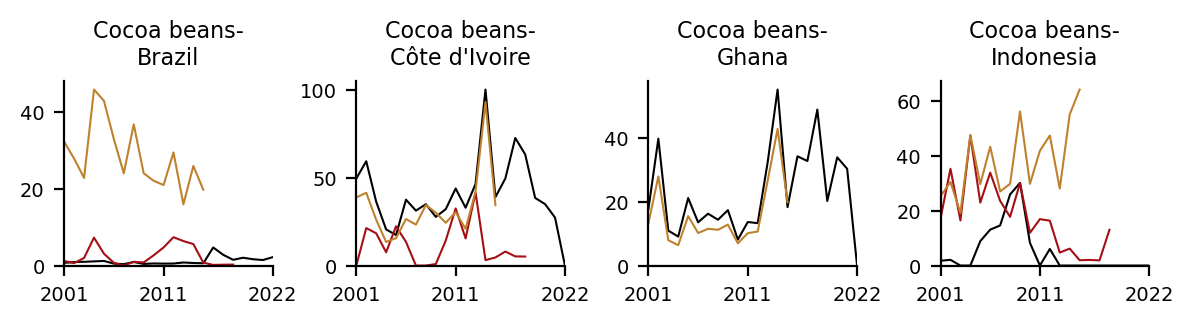

In [95]:
# Define the subplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7,1.2), dpi=200,
                            gridspec_kw={'hspace': 0.6, 'wspace': 0.4})
plt.rc('font', size=12)

ax = ax.flatten()  # Flatten the array for easy iteration
i = 0; j = 0

Commodity = 'Cocoa beans'

if Commodity == 'Cocoa beans':
    Country = ['Brazil','Côte d\'Ivoire','Ghana','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'cocoa')
if Commodity == 'Coffee, green':
    Country = ['Brazil','Côte d\'Ivoire','Indonesia','Peru']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'coffee')
if Commodity == 'Oil palm fruit':
    Country = ['Brazil','Colombia','Indonesia','Malaysia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'oil_palm')
if Commodity == 'Pasture':
    Country = ['Argentina','Brazil','Bolivia','Colombia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'pasture')
if Commodity == 'Soya beans':
    Country = ['Argentina','Bolivia','Brazil','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'soy')

for index, Select_country in enumerate(Country):
    Singh_et_al_selected = Singh_et_al.loc[Singh_et_al['Producer country'] == Select_country]
    Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity group'] == Commodity]
    else:
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity'] == Commodity]
    
    ax[index].plot(Singh_et_al_selected['Year'], Singh_et_al_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = 'black')
    
    Pendrill_attribution_selected = Pendrill_attribution.loc[Pendrill_attribution['Producer country'] == Select_country]
    Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity group'] == Commodity]
    else:
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity'] == Commodity]
    
    ax[index].plot(Pendrill_attribution_selected['Year'], Pendrill_attribution_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = '#a50f15', ls = '-')
    
    
    WRI_selected = WRI.loc[WRI['country'] == Select_country, WRI.columns != 'country'].values[0]
    ax[index].plot(np.linspace(2001,2015,15), WRI_selected/10**3, lw = 0.75, color = '#bf812d')
    
    
    ax[index].spines[['right', 'top']].set_visible(False)
    ax[index].set_ylim(0,)
    ax[index].set_xlim(2001,2022)
    ax[index].set_xticks([2001, 2011, 2022])
    ax[index].tick_params(which='both', labelsize=7)

for index, Select_country in enumerate(Country):
    ax[index].set_title(Commodity+'-\n'+Select_country, fontsize = 8)
    #ax[index].set_ylabel('Deforestation (kha)', fontsize = 8)

[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]

plt.tight_layout()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_5_cl.svg')

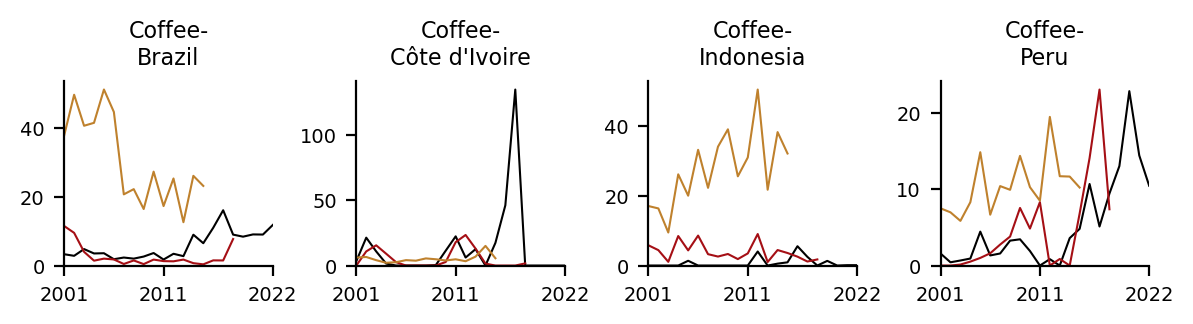

In [100]:
# Define the subplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7,1.2), dpi=200,
                            gridspec_kw={'hspace': 0.6, 'wspace': 0.4})
plt.rc('font', size=12)

ax = ax.flatten()  # Flatten the array for easy iteration
i = 0; j = 0

Commodity = 'Coffee, green'

if Commodity == 'Cocoa beans':
    Country = ['Brazil','Côte d\'Ivoire','Ghana','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'cocoa')
if Commodity == 'Coffee, green':
    Country = ['Brazil','Côte d\'Ivoire','Indonesia','Peru']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'coffee')
if Commodity == 'Oil palm fruit':
    Country = ['Brazil','Colombia','Indonesia','Malaysia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'oil_palm')
if Commodity == 'Pasture':
    Country = ['Argentina','Brazil','Bolivia','Colombia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'pasture')
if Commodity == 'Soya beans':
    Country = ['Argentina','Bolivia','Brazil','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'soy')

for index, Select_country in enumerate(Country):
    Singh_et_al_selected = Singh_et_al.loc[Singh_et_al['Producer country'] == Select_country]
    Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity group'] == Commodity]
    else:
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity'] == Commodity]
    
    ax[index].plot(Singh_et_al_selected['Year'], Singh_et_al_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = 'black')
    
    Pendrill_attribution_selected = Pendrill_attribution.loc[Pendrill_attribution['Producer country'] == Select_country]
    Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity group'] == Commodity]
    else:
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity'] == Commodity]
    
    ax[index].plot(Pendrill_attribution_selected['Year'], Pendrill_attribution_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = '#a50f15', ls = '-')
    
    
    WRI_selected = WRI.loc[WRI['country'] == Select_country, WRI.columns != 'country'].values[0]
    ax[index].plot(np.linspace(2001,2015,15), WRI_selected/10**3, lw = 0.75, color = '#bf812d')
    
    
    ax[index].spines[['right', 'top']].set_visible(False)
    ax[index].set_ylim(0,)
    ax[index].set_xlim(2001,2022)
    ax[index].set_xticks([2001, 2011, 2022])
    ax[index].tick_params(which='both', labelsize=7)

for index, Select_country in enumerate(Country):
    if Commodity == 'Coffee, green':
        Commodity = 'Coffee'
    ax[index].set_title(Commodity+'-\n'+Select_country, fontsize = 8)
    #ax[index].set_ylabel('Deforestation (kha)', fontsize = 8)

[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]

plt.tight_layout()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_5_cl.svg')

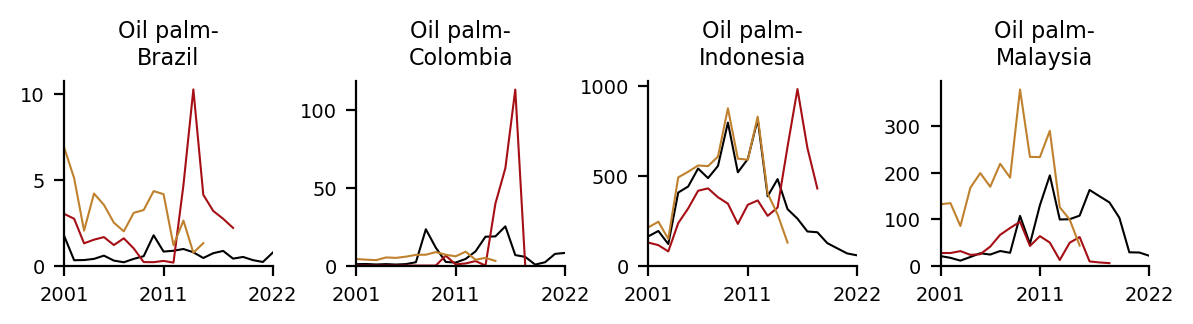

In [104]:
# Define the subplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7,1.2), dpi=200,
                            gridspec_kw={'hspace': 0.6, 'wspace': 0.4})
plt.rc('font', size=12)

ax = ax.flatten()  # Flatten the array for easy iteration
i = 0; j = 0

Commodity = 'Oil palm fruit'

if Commodity == 'Cocoa beans':
    Country = ['Brazil','Côte d\'Ivoire','Ghana','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'cocoa')
if Commodity == 'Coffee, green':
    Country = ['Brazil','Côte d\'Ivoire','Indonesia','Peru']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'coffee')
if Commodity == 'Oil palm fruit':
    Country = ['Brazil','Colombia','Indonesia','Malaysia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'oil_palm')
if Commodity == 'Pasture':
    Country = ['Argentina','Brazil','Bolivia','Colombia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'pasture')
if Commodity == 'Soya beans':
    Country = ['Argentina','Bolivia','Brazil','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'soy')

for index, Select_country in enumerate(Country):
    Singh_et_al_selected = Singh_et_al.loc[Singh_et_al['Producer country'] == Select_country]
    Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity group'] == Commodity]
    else:
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity'] == Commodity]
    
    ax[index].plot(Singh_et_al_selected['Year'], Singh_et_al_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = 'black')
    
    Pendrill_attribution_selected = Pendrill_attribution.loc[Pendrill_attribution['Producer country'] == Select_country]
    Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity group'] == Commodity]
    else:
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity'] == Commodity]
    
    ax[index].plot(Pendrill_attribution_selected['Year'], Pendrill_attribution_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = '#a50f15', ls = '-')
    
    
    WRI_selected = WRI.loc[WRI['country'] == Select_country, WRI.columns != 'country'].values[0]
    ax[index].plot(np.linspace(2001,2015,15), WRI_selected/10**3, lw = 0.75, color = '#bf812d')
    
    
    ax[index].spines[['right', 'top']].set_visible(False)
    ax[index].set_ylim(0,)
    ax[index].set_xlim(2001,2022)
    ax[index].set_xticks([2001, 2011, 2022])
    ax[index].tick_params(which='both', labelsize=7)

for index, Select_country in enumerate(Country):
    if Commodity == 'Oil palm fruit':
        Commodity = 'Oil palm'
    ax[index].set_title(Commodity+'-\n'+Select_country, fontsize = 8)
    #ax[index].set_ylabel('Deforestation (kha)', fontsize = 8)

[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]

plt.tight_layout()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_5_cl.svg')

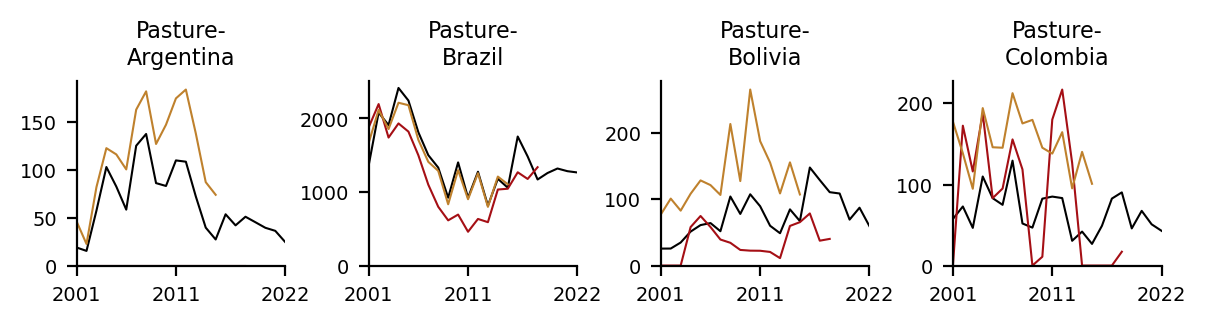

In [105]:
# Define the subplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7,1.2), dpi=200,
                            gridspec_kw={'hspace': 0.6, 'wspace': 0.4})
plt.rc('font', size=12)

ax = ax.flatten()  # Flatten the array for easy iteration
i = 0; j = 0

Commodity = 'Pasture'

if Commodity == 'Cocoa beans':
    Country = ['Brazil','Côte d\'Ivoire','Ghana','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'cocoa')
if Commodity == 'Coffee, green':
    Country = ['Brazil','Côte d\'Ivoire','Indonesia','Peru']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'coffee')
if Commodity == 'Oil palm fruit':
    Country = ['Brazil','Colombia','Indonesia','Malaysia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'oil_palm')
if Commodity == 'Pasture':
    Country = ['Argentina','Brazil','Bolivia','Colombia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'pasture')
if Commodity == 'Soya beans':
    Country = ['Argentina','Bolivia','Brazil','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'soy')

for index, Select_country in enumerate(Country):
    Singh_et_al_selected = Singh_et_al.loc[Singh_et_al['Producer country'] == Select_country]
    Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity group'] == Commodity]
    else:
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity'] == Commodity]
    
    ax[index].plot(Singh_et_al_selected['Year'], Singh_et_al_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = 'black')
    
    Pendrill_attribution_selected = Pendrill_attribution.loc[Pendrill_attribution['Producer country'] == Select_country]
    Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity group'] == Commodity]
    else:
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity'] == Commodity]
    
    ax[index].plot(Pendrill_attribution_selected['Year'], Pendrill_attribution_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = '#a50f15', ls = '-')
    
    
    WRI_selected = WRI.loc[WRI['country'] == Select_country, WRI.columns != 'country'].values[0]
    ax[index].plot(np.linspace(2001,2015,15), WRI_selected/10**3, lw = 0.75, color = '#bf812d')
    
    
    ax[index].spines[['right', 'top']].set_visible(False)
    ax[index].set_ylim(0,)
    ax[index].set_xlim(2001,2022)
    ax[index].set_xticks([2001, 2011, 2022])
    ax[index].tick_params(which='both', labelsize=7)

for index, Select_country in enumerate(Country):
    if Commodity == 'Oil palm fruit':
        Commodity = 'Oil palm'
    ax[index].set_title(Commodity+'-\n'+Select_country, fontsize = 8)
    #ax[index].set_ylabel('Deforestation (kha)', fontsize = 8)

[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]

plt.tight_layout()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_5_cl.svg')

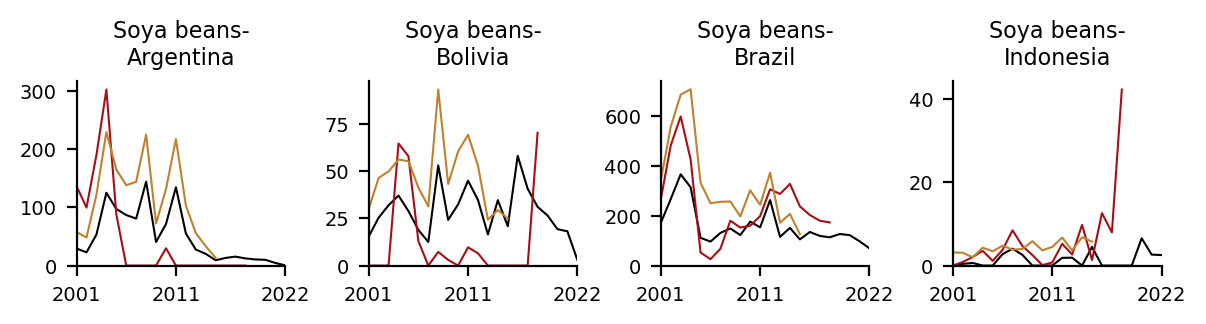

In [106]:
# Define the subplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7,1.2), dpi=200,
                            gridspec_kw={'hspace': 0.6, 'wspace': 0.4})
plt.rc('font', size=12)

ax = ax.flatten()  # Flatten the array for easy iteration
i = 0; j = 0

Commodity = 'Soya beans'

if Commodity == 'Cocoa beans':
    Country = ['Brazil','Côte d\'Ivoire','Ghana','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'cocoa')
if Commodity == 'Coffee, green':
    Country = ['Brazil','Côte d\'Ivoire','Indonesia','Peru']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'coffee')
if Commodity == 'Oil palm fruit':
    Country = ['Brazil','Colombia','Indonesia','Malaysia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'oil_palm')
if Commodity == 'Pasture':
    Country = ['Argentina','Brazil','Bolivia','Colombia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'pasture')
if Commodity == 'Soya beans':
    Country = ['Argentina','Bolivia','Brazil','Indonesia']
    WRI = pd.read_excel(f'{home_folder}{Simulation_version}/Goldman et al data - commodity_loss_country_summary.xlsx', sheet_name = 'soy')

for index, Select_country in enumerate(Country):
    Singh_et_al_selected = Singh_et_al.loc[Singh_et_al['Producer country'] == Select_country]
    Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity group'] == Commodity]
    else:
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity'] == Commodity]
    
    ax[index].plot(Singh_et_al_selected['Year'], Singh_et_al_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = 'black')
    
    Pendrill_attribution_selected = Pendrill_attribution.loc[Pendrill_attribution['Producer country'] == Select_country]
    Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity group'] == Commodity]
    else:
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity'] == Commodity]
    
    ax[index].plot(Pendrill_attribution_selected['Year'], Pendrill_attribution_selected['Deforestation attribution, unamortized (ha)']/10**3,
                   lw = 0.75, color = '#a50f15', ls = '-')
    
    
    WRI_selected = WRI.loc[WRI['country'] == Select_country, WRI.columns != 'country'].values[0]
    ax[index].plot(np.linspace(2001,2015,15), WRI_selected/10**3, lw = 0.75, color = '#bf812d')
    
    
    ax[index].spines[['right', 'top']].set_visible(False)
    ax[index].set_ylim(0,)
    ax[index].set_xlim(2001,2022)
    ax[index].set_xticks([2001, 2011, 2022])
    ax[index].tick_params(which='both', labelsize=7)

for index, Select_country in enumerate(Country):
    if Commodity == 'Oil palm fruit':
        Commodity = 'Oil palm'
    ax[index].set_title(Commodity+'-\n'+Select_country, fontsize = 8)
    #ax[index].set_ylabel('Deforestation (kha)', fontsize = 8)

[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]

plt.tight_layout()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_5_cl.svg')

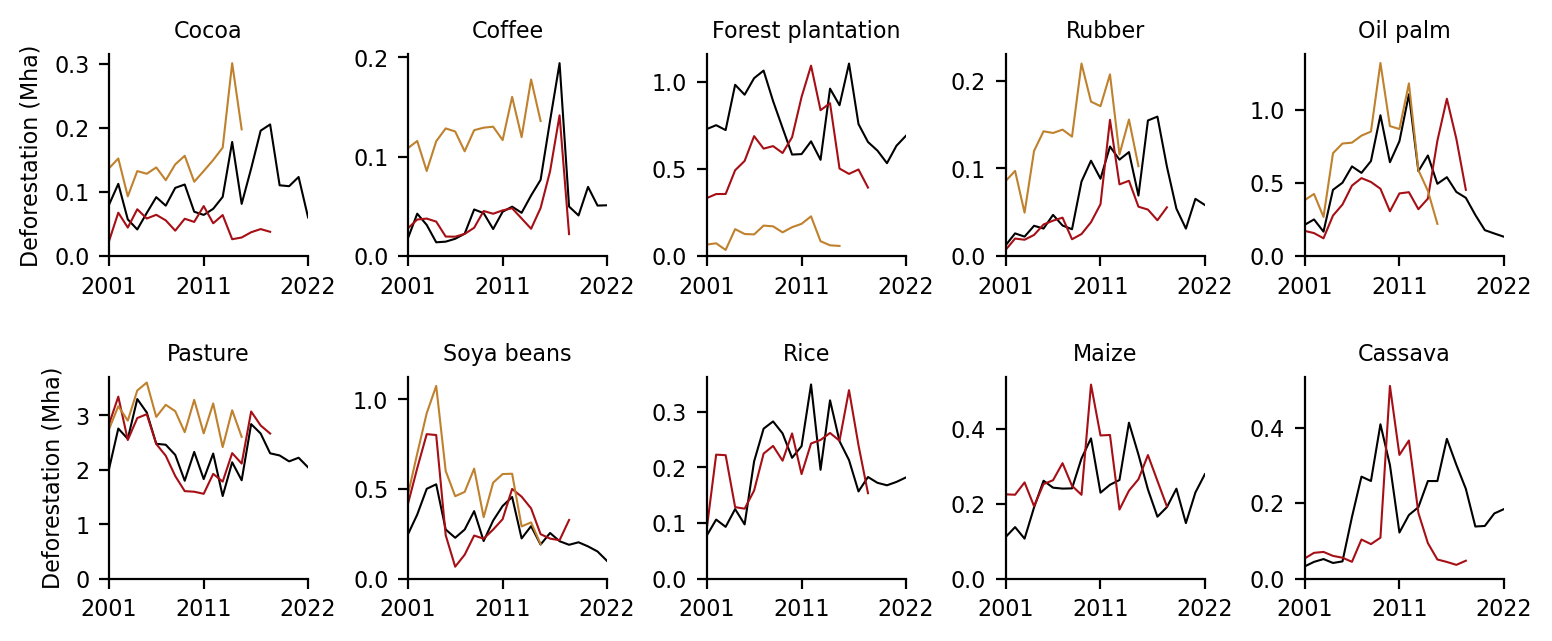

In [448]:
# Define the subplots
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(9, 5.5), dpi=200,
                            gridspec_kw={'hspace': 0.6, 'wspace': 0.5})
plt.rc('font', size=15.5)

ax = ax.flatten()  # Flatten the array for easy iteration
i = 0; j = 0
for index, Commodity in enumerate(['Cocoa beans', 'Coffee, green', 'Forest plantation', 'Natural rubber in primary forms', 'Oil palm fruit',  'Pasture', 'Soya beans',
                                   'Rice', 'Maize (corn)', 'Cassava, fresh']):
    
    Singh_et_al_selected = Singh_et_al.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity group'] == Commodity]
    else:
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity'] == Commodity]
    ax[index].plot(Singh_et_al_selected['Year'], Singh_et_al_selected['Deforestation attribution, unamortized (ha)']/10**6,
               lw = 0.75, color = 'black')

    
    Pendrill_attribution_selected = Pendrill_attribution.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity group'] == Commodity]
    else:
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity'] == Commodity]
    ax[index].plot(Pendrill_attribution_selected['Year'], Pendrill_attribution_selected['Deforestation attribution, unamortized (ha)']/10**6,
               lw = 0.75, color = '#a50f15', ls = '-')
    
    
    if Commodity not in ['Rice', 'Maize (corn)', 'Cassava, fresh']:
        ax[index].plot(WRI['Year'], WRI[Commodity]/10**6, lw = 0.75, color = '#bf812d')
    
    ax[index].spines[['right', 'top']].set_visible(False)
    ax[index].set_ylim(0,)
    ax[index].set_xlim(2001,2022)
    ax[index].set_xticks([2001, 2011, 2022])
    ax[index].tick_params(which='both', labelsize=8)

for index, Commodity in enumerate(['Cocoa', 'Coffee', 'Forest plantation', 'Rubber', 'Oil palm',  'Pasture', 'Soya beans', 'Rice', 'Maize', 'Cassava']):
    ax[index].set_title(Commodity, fontsize = 8)

[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]
ax[0].set_ylabel('Deforestation (Mha)', fontsize = 8)
ax[5].set_ylabel('Deforestation (Mha)', fontsize = 8)
plt.tight_layout()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_5_cl.svg')

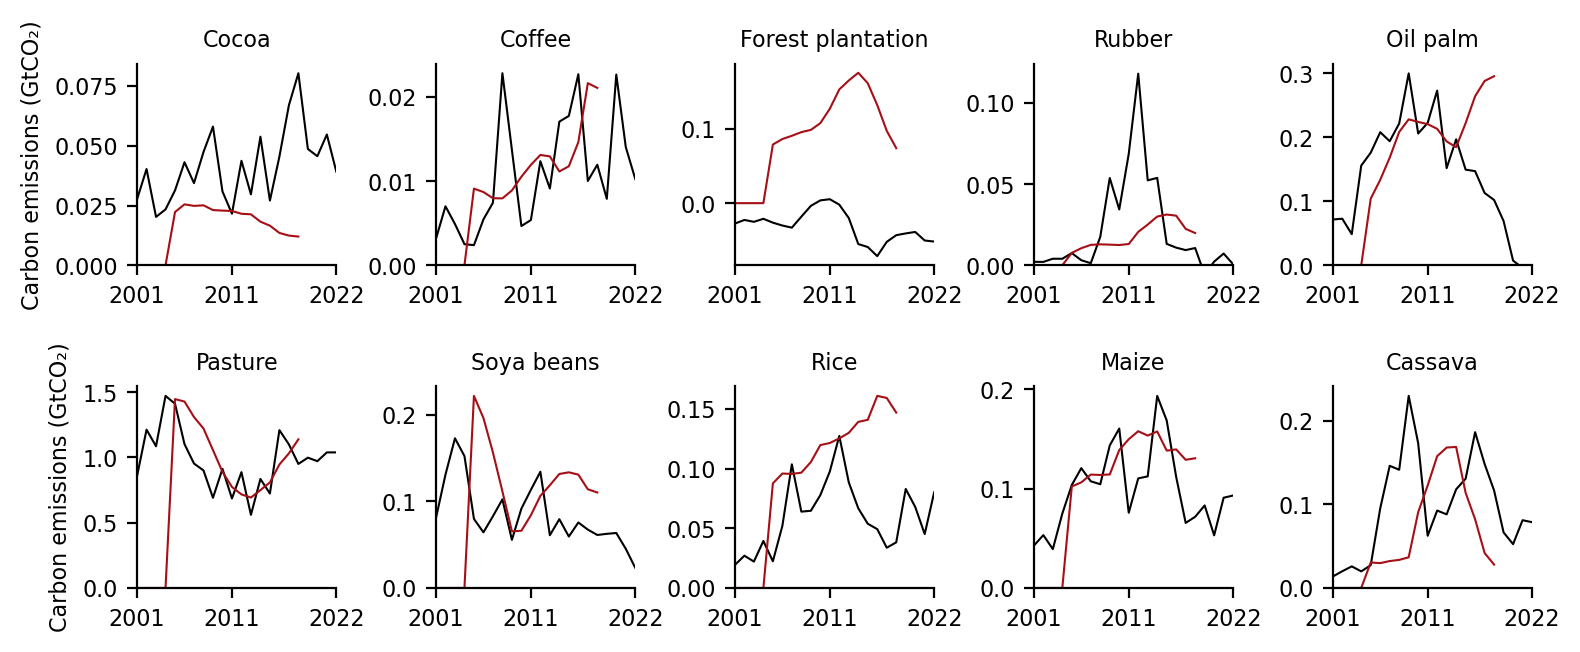

In [98]:
# Define the subplots
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(9, 5.5), dpi=200,
                            gridspec_kw={'hspace': 0.6, 'wspace': 0.5})
plt.rc('font', size=15.5)

ax = ax.flatten()  # Flatten the array for easy iteration
i = 0; j = 0
for index, Commodity in enumerate(['Cocoa beans', 'Coffee, green', 'Forest plantation', 'Natural rubber in primary forms', 'Oil palm fruit',  'Pasture', 'Soya beans',
                                   'Rice', 'Maize (corn)', 'Cassava, fresh']):
    
    Singh_et_al_selected = Singh_et_al.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Singh_et_al_selected = Singh_et_al_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity group'] == Commodity]
    else:
        Singh_et_al_selected = Singh_et_al_selected.loc[Singh_et_al_selected['Commodity'] == Commodity]
    ax[index].plot(Singh_et_al_selected['Year'], Singh_et_al_selected['Deforestation emissions excl. peat drainage, unamortized (MtCO2)']/10**3,
               lw = 0.75, color = 'black')
    
    Pendrill_attribution_selected = Pendrill_attribution.groupby(['Commodity group','Commodity', 'Year']).sum().reset_index()
    if Commodity in ['Forest plantation', 'Pasture']:
        Pendrill_attribution_selected = Pendrill_attribution_selected.groupby(['Commodity group', 'Year']).sum().reset_index()
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity group'] == Commodity]
    else:
        Pendrill_attribution_selected = Pendrill_attribution_selected.loc[Pendrill_attribution_selected['Commodity'] == Commodity]
    ax[index].plot(Pendrill_attribution_selected['Year'], Pendrill_attribution_selected['Deforestation emissions excl. peat drainage, amortized (MtCO2)']/10**3,
               lw = 0.75, color = '#a50f15', ls = '-')
    #if Commodity not in ['Rice', 'Maize (corn)', 'Cassava, fresh']:
    #    ax[index].plot(WRI['Year'], WRI[Commodity]/10**6, lw = 0.75, color = '#bf812d')
    
    ax[index].spines[['right', 'top']].set_visible(False)
    if index != 2:
        ax[index].set_ylim(0,)
    ax[index].set_xlim(2001,2022)
    ax[index].set_xticks([2001, 2011, 2022])
    ax[index].tick_params(which='both', labelsize=8)

for index, Commodity in enumerate(['Cocoa', 'Coffee', 'Forest plantation', 'Rubber', 'Oil palm',  'Pasture', 'Soya beans', 'Rice', 'Maize', 'Cassava']):
    ax[index].set_title(Commodity, fontsize = 8)

[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]
ax[0].set_ylabel('Carbon emissions (GtCO₂)', fontsize = 8)
ax[5].set_ylabel('Carbon emissions (GtCO₂)', fontsize = 8)
plt.tight_layout()
fig.savefig('/home/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Figure_5_cl.svg')

In [97]:
index

9

In [81]:
# Custom function to calculate the weighted mean
def weighted_mean(group):
    quality_index = group['Quality Index']
    weights = group['Deforestation attribution, unamortized (ha)']
    try:
        return (quality_index * weights).sum() / weights.sum()
    except ZeroDivisionError:
        return np.nan

In [82]:
Singh_et_al.groupby(['Producer country']).apply(
    lambda group: pd.Series({
        'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
        'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
        'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
        'Quality Index': weighted_mean(group)})
    ).reset_index()

,Producer country,"Deforestation attribution, unamortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)",Peatland drainage emissions (MtCO2),Quality Index
0,Afghanistan,4.420508e+02,0.211168,0.004044,0.433700
1,Albania,1.104088e+04,0.791445,0.001302,0.278445
2,Algeria,7.477619e+03,1.952677,0.025528,0.443342
3,Angola,1.229576e+06,704.970744,2.203112,0.311879
4,Antigua and Barbuda,4.039836e+02,0.160959,0.002888,0.326261
...,...,...,...,...,...
171,Venezuela,8.308020e+05,361.374180,6.235285,0.312426
172,Vietnam,2.124754e+06,753.146017,10.760202,0.394757
173,Yemen,2.246056e-01,0.000083,0.000000,0.364977
174,Zambia,7.190740e+05,487.253578,0.493663,0.352211


In [241]:
Att_agg = pd.read_excel(f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx', sheet_name = 'Deforestation attribution')

In [278]:
# Aggregating the data to countries
Att_agg_table = Att_agg.groupby(['Producer country']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions incl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions incl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

In [279]:
Att_agg_table

,Producer country,"Deforestation attribution, unamortized (ha)","Deforestation emissions incl. peat drainage, unamortized (MtCO2)",Peatland drainage emissions (MtCO2),Quality Index
0,Afghanistan,4.420508e+02,0.121166,0.004044,0.436685
1,Albania,1.104088e+04,1.005428,0.001302,0.279019
2,Algeria,7.477619e+03,1.876569,0.025528,0.443377
3,Angola,1.229576e+06,322.516000,2.203112,0.313587
4,Antigua and Barbuda,4.039836e+02,0.107069,0.002888,0.344228
...,...,...,...,...,...
176,Venezuela,5.009255e+05,191.703864,1.507536,0.535990
177,Vietnam,2.156294e+06,708.534870,10.726489,0.313756
178,Yemen,2.246056e-01,0.000036,0.000000,0.365295
179,Zambia,7.190740e+05,235.440415,0.493663,0.358811


In [283]:
# Function to calculate mean and standard deviation for each country across years
def calculate_aggregated_stats(group):
    # Aggregating data for each year first
    yearly_data = group.groupby('Year').agg({
        'Deforestation attribution, unamortized (ha)': 'sum',
        'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': 'sum',
        'Peatland drainage emissions (MtCO2)': 'sum',
    }).reset_index()
    
    # Calculating total, mean, and standard deviation for the aggregated yearly data
    mean_deforestation = yearly_data['Deforestation attribution, unamortized (ha)'].mean()
    std_deforestation = yearly_data['Deforestation attribution, unamortized (ha)'].std()

    mean_emissions = yearly_data['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].mean()
    std_emissions = yearly_data['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].std()

    mean_peat_emissions = yearly_data['Peatland drainage emissions (MtCO2)'].mean()
    std_peat_emissions = yearly_data['Peatland drainage emissions (MtCO2)'].std()

    
    return pd.Series({
        'Deforestation attribution (ha)': f"({mean_deforestation:.2f} ± {std_deforestation:.2f})",
        'Deforestation emissions excl. peat drainage (MtCO2)': f"({mean_emissions:.2f} ± {std_emissions:.2f})",
        'Peatland drainage emissions (MtCO2)': f"({mean_peat_emissions:.2f} ± {std_peat_emissions:.2f})",
    })

# Applying the function to the data grouped by 'Producer country'
Att_agg_table = Att_agg.groupby('Producer country').apply(calculate_aggregated_stats).reset_index()


In [284]:
Att_agg_table

,Producer country,Deforestation attribution (ha),Deforestation emissions excl. peat drainage (MtCO2),Peatland drainage emissions (MtCO2)
0,Afghanistan,(20.09 ± 22.86),(0.01 ± 0.01),(0.00 ± 0.00)
1,Albania,(501.86 ± 863.56),(0.05 ± 0.05),(0.00 ± 0.00)
2,Algeria,(339.89 ± 153.38),(0.08 ± 0.04),(0.00 ± 0.00)
3,Angola,(55889.81 ± 19475.49),(14.56 ± 5.10),(0.10 ± 0.05)
4,Antigua and Barbuda,(18.36 ± 14.21),(0.00 ± 0.00),(0.00 ± 0.00)
...,...,...,...,...
176,Venezuela,(22769.34 ± 8205.12),(8.65 ± 3.00),(0.07 ± 0.06)
177,Vietnam,(98013.38 ± 44638.22),(31.72 ± 13.41),(0.49 ± 0.38)
178,Yemen,(0.01 ± 0.03),(0.00 ± 0.00),(0.00 ± 0.00)
179,Zambia,(32685.18 ± 17662.34),(10.68 ± 6.28),(0.02 ± 0.01)


In [273]:
print(Att_agg.loc[Att_agg['Producer country'] == 'Afghanistan'].groupby(['Producer country', 'Year']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions incl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions incl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()['Deforestation attribution, unamortized (ha)'].values.std())

22.332404498783742


In [288]:
Year = '(2001-2022)'
Singh_et_al = pd.read_excel(f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Aggregated_Deforestation_attribution_Countries_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [292]:
Country_lookup_codes = pd.read_excel(home_folder+Simulation_version+'/Supplementary_data-DeDuCE v1.xlsx', 'Lookup-Country (GADM vs FAO)') 
Singh_et_al['FAO country'] = Singh_et_al['Producer country'].map(Country_lookup_codes.set_index('GADM Countries')['FAO countries'])

In [339]:
# Function to extract forest plantation dataset from FRA (https://fra-data.fao.org/assessments/fra/2020)
def preprocessing_dataframe_FRA(Country): 
    if Country == 'China, mainland':
        Country = 'China'
    if Country == 'French Guiana':
        Country = 'French Guyana'
    
    Global_Forest_Resources_Assessment = pd.read_csv('/home/chandra/backup/Chalmers/FAOSTATS/fra-forestCharacteristics_natural forest.csv')[['Country', 'Naturally regenerating forest ( 1000 ha )']]
    Global_Forest_Resources_Assessment.loc[Global_Forest_Resources_Assessment['Country'] == Country]
    
    Global_Forest_Resources_Assessment = Global_Forest_Resources_Assessment.fillna(0)
    Global_Forest_Resources_Assessment['Country'] = Global_Forest_Resources_Assessment['Country'].str.replace(' \(Desk study\)', '', regex=True)
    if Country == 'Sudan (former)':
        Global_Forest_Resources_Assessment = Global_Forest_Resources_Assessment[Global_Forest_Resources_Assessment['Country'].isin(['Sudan', 'South Sudan'])]
        Global_Forest_Resources_Assessment['Country'] = Country
        Global_Forest_Resources_Assessment = Global_Forest_Resources_Assessment.groupby(['Country']).sum().reset_index()
    if Country == 'Serbia and Montenegro':
        Global_Forest_Resources_Assessment = Global_Forest_Resources_Assessment[Global_Forest_Resources_Assessment['Country'].isin(['Serbia', 'Montenegro'])]
        Global_Forest_Resources_Assessment['Country'] = Country
        Global_Forest_Resources_Assessment = Global_Forest_Resources_Assessment.groupby(['Country']).sum().reset_index()
    else:
        Global_Forest_Resources_Assessment = Global_Forest_Resources_Assessment[Global_Forest_Resources_Assessment['Country'] == Country]

    return Global_Forest_Resources_Assessment['Naturally regenerating forest ( 1000 ha )'].values[0]*1000
    #return Global_Forest_Resources_Assessment['Naturally regenerating forest ( 1000 ha )']

In [340]:
preprocessing_dataframe_FRA('Türkiye')

19592650.0

In [341]:
Singh_et_al['Natural forest'] = np.nan
for Producer in Singh_et_al['FAO country'].unique():
    Singh_et_al.loc[Singh_et_al['FAO country'] == Producer, 'Natural forest'] = preprocessing_dataframe_FRA(Producer)

In [343]:
Singh_et_al['Difference'] = Singh_et_al['Natural forest'] - Singh_et_al['Deforestation attribution, unamortized (ha)']

In [350]:
Singh_et_al['% of forest'] = Singh_et_al['Deforestation attribution, unamortized (ha)']/Singh_et_al['Natural forest']*100

In [352]:
Singh_et_al

,Producer country,"Deforestation attribution, unamortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)",Peatland drainage emissions (MtCO2),Quality Index,FAO country,Natural forest,Difference,% of forest
0,Afghanistan,4.420508e+02,0.117122,0.004044,0.436685,Afghanistan,1208440.0,1.207998e+06,0.036580
1,Albania,1.104088e+04,1.004126,0.001302,0.279019,Albania,0.0,-1.104088e+04,inf
2,Algeria,7.477619e+03,1.851041,0.025528,0.443377,Algeria,1234000.0,1.226522e+06,0.605966
3,Angola,1.229576e+06,320.312888,2.203112,0.313587,Angola,76766880.0,7.553730e+07,1.601701
4,Antigua and Barbuda,4.039836e+02,0.104181,0.002888,0.344228,Antigua and Barbuda,0.0,-4.039836e+02,inf
...,...,...,...,...,...,...,...,...,...
176,Venezuela,5.009255e+05,190.196328,1.507536,0.535990,Venezuela (Bolivarian Republic of),48411440.0,4.791051e+07,1.034725
177,Vietnam,2.156294e+06,697.808382,10.726489,0.313756,Viet Nam,9864530.0,7.708236e+06,21.859069
178,Yemen,2.246056e-01,0.000036,0.000000,0.365295,Yemen,549000.0,5.489998e+05,0.000041
179,Zambia,7.190740e+05,234.946752,0.493663,0.358811,Zambia,46999000.0,4.627993e+07,1.529977


In [31]:
commodities = ['Cattle meat', 'Cocoa beans', 'Coffee, green', 'Forest plantation', 'Natural rubber in primary forms', 
               'Oil palm fruit', 'Soya beans', 'Rice', 'Maize (corn)', 'Cassava, fresh']

output_path = '/cfs/klemming/projects/supr/chandra/backup/Chalmers/DeDuCE v1.0.1 (2001-2022)/Figures/Source_Fig_4.xlsx'

# Write each commodity to its own sheet
with pd.ExcelWriter(output_path) as writer:
    for comm in commodities:
        if comm == 'Forest plantation':
            df_comm = Singh_et_al.loc[
                (Singh_et_al['Commodity group'] == comm) & (Singh_et_al['Year'] == 2022),
                ['ISO', 'Producer country', 'Deforestation risk, amortized (ha)']]
        else:
            df_comm = Singh_et_al.loc[
                (Singh_et_al['Commodity'] == comm) & (Singh_et_al['Year'] == 2022),
                ['ISO', 'Producer country', 'Deforestation risk, amortized (ha)']]
        sheet_name = comm if len(comm) <= 31 else comm[:31]
        df_comm.to_excel(writer, sheet_name=sheet_name, index=False)

In [22]:
Year = '(2001-2022)'
Singh_et_al = pd.read_excel(f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx', sheet_name = 'Deforestation attribution')

In [74]:
Brazil = Singh_et_al.loc[Singh_et_al['Producer country'] == 'Brazil']
Brazil = Brazil[['Year', 'Commodity group', 'Deforestation attribution, unamortized (ha)']]
Brazil = Brazil.groupby(['Year','Commodity group']).sum().reset_index()

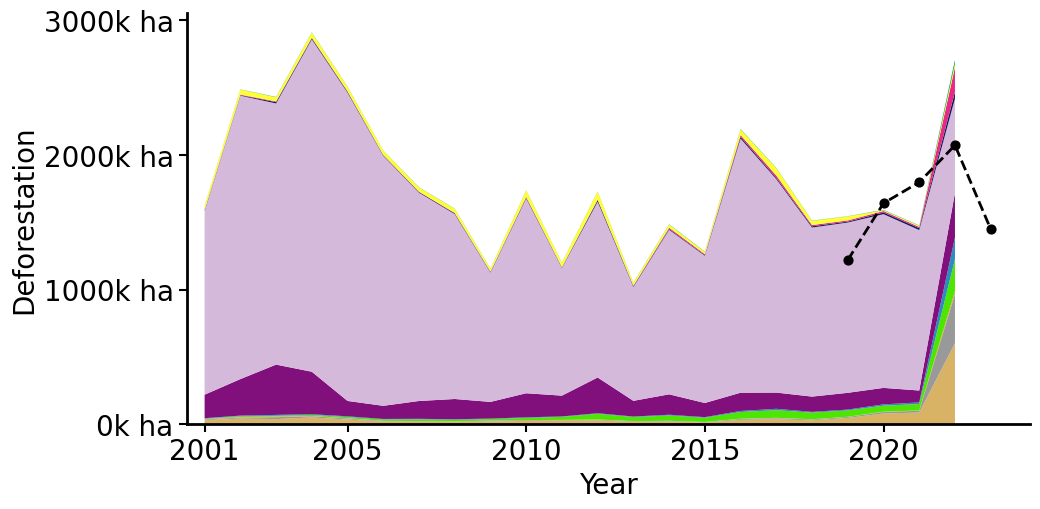

In [138]:
# Pivot the DataFrame to get years as columns and commodity groups as rows
pivot_df = Brazil.pivot(index='Commodity group', columns='Year', values='Deforestation attribution, unamortized (ha)')
color_map = dict(zip(Commodity_group_color['Commodity group'], Commodity_group_color['Color']))
colors = [color_map[group] for group in pivot_df.index]
# Plotting
plt.figure(figsize=(10.5, 5.2))
plt.stackplot(pivot_df.columns, pivot_df.values, labels=pivot_df.index, baseline='zero', colors=colors)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Deforestation', fontsize = 20)
plt.legend(loc='upper left')
plt.plot([2019, 2020, 2021, 2022, 2023], [1219446.11,1640871.344,1796924.094,2071418.74,1449143.848], color = 'black', lw = 2, ls = '--')
plt.scatter([2019, 2020, 2021, 2022, 2023], [1219446.11,1640871.344,1796924.094,2071418.74,1449143.848], color = 'black', s = 40)

# Define the formatting function
def millions_formatter(x, pos):
    return '{:.0f}k ha'.format(x / 1000)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.gca().spines[['right', 'top']].set_visible(False)
plt.tick_params(which='both', labelsize=20)
plt.xlim(2000.5,)
plt.xticks([2001, 2005, 2010, 2015, 2020])
plt.yticks([0, 10**6, 2*10**6, 3*10**6])
plt.legend().remove()

plt.tick_params(axis='both', which='major', labelsize=20, width=1.5, length=6)
plt.gca().spines['left'].set_linewidth(2)  # Top border
plt.gca().spines['bottom'].set_linewidth(2)  # Bottom border
plt.tight_layout()
plt.show()

In [114]:
file_name = f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Aggregated_Deforestation_attribution_Countries_v1.0.1 (2001-2022).xlsx'
file = pd.read_excel(file_name)

In [118]:
file_name = f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Aggregated_Deforestation_attribution_Commodities_v1.0.1 (2001-2022).xlsx'
file = pd.read_excel(file_name)

In [119]:
# 3. Round 'Quality Index' to two decimal places
file['Quality Index'] = file['Quality Index'].round(2)

# 5. Handle values less than 1 but greater than 0.01, and others as specified
def format_value_1(val):
    try:
        val_float = float(val)
        if val_float < 1:
            return "<1"
        elif val_float == 0:
            return "0"
        else:
            return f"{val_float:,.2f}"
    except:
        return val
        
def format_value(val):
    try:
        val_float = float(val)
        if 0 < val_float < 0.01:
            return "<0.01"
        elif val_float == 0:
            return "0"
        else:
            return f"{val_float:,.2f}"
    except:
        return val

cols_to_format = ['Deforestation attribution, unamortized (ha)']
for col in cols_to_format:
    file[col] = file[col].apply(format_value_1)

cols_to_format = ['Deforestation emissions excl. peat drainage, unamortized (MtCO2)', 
                  'Peatland drainage emissions (MtCO2)']
for col in cols_to_format:
    file[col] = file[col].apply(format_value)

# Reapply comma separator to 'Deforestation attribution, unamortized (ha)' as whole numbers
file['Deforestation attribution, unamortized (ha)'] = file['Deforestation attribution, unamortized (ha)'].str.split('.').str[0]

# 6. Add 'Sr.No.' column with sequential numbers starting from 1
file.insert(0, 'Sr.No.', range(1, len(file) + 1))

In [116]:
file.loc[file['Producer country'] == 'Yemen']

,Sr.No.,Producer country,"Deforestation attribution, unamortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)",Peatland drainage emissions (MtCO2),Quality Index
178,179,Yemen,<1,<0.01,0,0.37


In [117]:
file.to_excel(f'{home_folder}{Simulation_version}/Figures/Supplementary_Table_1.xlsx')

In [120]:
file.to_excel(f'{home_folder}{Simulation_version}/Figures/Supplementary_Table_2.xlsx')